<a href="https://colab.research.google.com/github/danirojas-nicole/stonedredliningpubpol2130/blob/Individual-Code-Notebooks/Izabela's_Dataproducts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%config InlineBackend.figure_formats = ["retina"]

In [ ]:
!pip install -q geopandas seaborn folium census
# This installs the census package.
!pip install census
# This specifies US from the census package.
!pip install us

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.9/356.9 kB 19.5 MB/s eta 0:00:00


In [ ]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from branca.utilities import color_brewer

# Importing census package, import states, make sure pandas library is imported, and import os to make automated functions easier.
from census import Census
from us import states
import os

# Added in for geocoding.
import requests

# Redlining (Izabela, partly Dani)

In [ ]:
census = Census("", year=2020)

In [ ]:
hri_gdf = gpd.read_file("https://raw.githubusercontent.com/PUBPOL-2130/notebooks/refs/heads/main/data/HRI2020.zip")

In [ ]:
hri_gdf

,OBJECTID_1,OBJECTID,GEOID20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020,geometry
0,0,1,01097001502,848502.0,0.0,+30.6568785,-088.0688375,33681.0,"Mobile, AL",0.043989,4,0.043989,0.000080,3.924200,3.9,"POLYGON ((-88.07488 30.64997, -88.07459 30.650..."
1,0,3,01073004502,2953269.0,0.0,+33.5071040,-086.8031176,13820.0,"Birmingham-Hoover, AL",0.077309,4,0.077309,0.000287,3.939468,3.9,"POLYGON ((-86.81747 33.50731, -86.8174 33.5073..."
2,0,4,01073004501,723960.0,0.0,+33.4983380,-086.8072523,13820.0,"Birmingham-Hoover, AL",0.039856,4,0.039856,0.000070,3.551947,3.6,"POLYGON ((-86.81556 33.49672, -86.81517 33.497..."
3,0,6,01073002402,4990907.0,0.0,+33.5299121,-086.7865984,13820.0,"Birmingham-Hoover, AL",0.102104,4,0.102104,0.000484,3.997646,4.0,"POLYGON ((-86.80414 33.52829, -86.80397 33.528..."
4,0,7,01073002401,3488479.0,0.0,+33.5209629,-086.7775618,13820.0,"Birmingham-Hoover, AL",0.101521,4,0.101521,0.000339,3.751425,3.8,"POLYGON ((-86.79666 33.5172, -86.79389 33.5185..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,0,16596,55079007900,534569.0,24150.0,+43.0661920,-087.8957527,33340.0,"Milwaukee-Waukesha-West Allis,",0.037109,4,0.037109,0.000062,3.956915,4.0,"POLYGON ((-87.9004 43.06418, -87.90038 43.0652..."
13484,0,16597,55079008000,326024.0,0.0,+43.0674802,-087.9028298,33340.0,"Milwaukee-Waukesha-West Allis,",0.024456,4,0.024456,0.000036,4.000000,4.0,"POLYGON ((-87.90534 43.06421, -87.90533 43.065..."
13485,0,16598,55079007700,679121.0,21023.0,+43.0649318,-087.8886201,33340.0,"Milwaukee-Waukesha-West Allis,",0.038491,3,0.038491,0.000077,3.000000,3.0,"POLYGON ((-87.89505 43.06792, -87.89497 43.067..."
13486,0,16599,55079008100,278881.0,0.0,+43.0674717,-087.9074384,33340.0,"Milwaukee-Waukesha-West Allis,",0.023043,4,0.023043,0.000031,3.650345,3.7,"POLYGON ((-87.90961 43.06425, -87.9096 43.0653..."


In [ ]:
# A list of our areas of interest in NY.
# We'll be working on upstate NY regions within the hri_gdf dataset.
metro_areas = {
    "Syracuse, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Syracuse, NY"],
    "Buffalo-Cheektowaga-Niagara Fa": hri_gdf[hri_gdf["METRO_NAME"] == "Buffalo-Cheektowaga-Niagara Fa"],
    "Rochester, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Rochester, NY"],
    "Poughkeepsie-Newburgh, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Poughkeepsie-Newburgh, NY"],
    "Albany-Schenectady-Troy, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Albany-Schenectady-Troy, NY"],
    "Binghamton, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Binghamton, NY"],
    "Utica-Rose, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Utica-Rose, NY"],
    "Elmira, NY": hri_gdf[hri_gdf["METRO_NAME"] == "Elmira, NY"],
}
# Next, we will filter the redlining data so it only consists of the above metro areas.

In [ ]:
# This makes a list of the metro areas we want.
metro_areas = list(metro_areas.keys())

# This filters the redlining data so it only consists of the above metro areas.
filtered_hri_gdf = hri_gdf[hri_gdf["METRO_NAME"].isin(metro_areas)]

In [ ]:
filtered_hri_gdf

,OBJECTID_1,OBJECTID,GEOID20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020,geometry
7630,0,9416,36067005300,695617.0,0.0,+43.0317144,-076.1476356,45060.0,"Syracuse, NY",0.038292,3,0.038292,0.000077,3.178969,3.2,"POLYGON ((-76.15383 43.03142, -76.15324 43.031..."
7631,0,9417,36067000300,541795.0,0.0,+43.0810832,-076.1483759,45060.0,"Syracuse, NY",0.040518,2,0.040518,0.000060,2.022436,2.0,"POLYGON ((-76.15607 43.08171, -76.15539 43.082..."
7632,0,9418,36067002300,572622.0,0.0,+43.0555187,-076.1483882,45060.0,"Syracuse, NY",0.035841,4,0.035841,0.000063,3.609256,3.6,"POLYGON ((-76.15482 43.05429, -76.15481 43.054..."
7633,0,9419,36067001400,415681.0,0.0,+43.0638377,-076.1481159,45060.0,"Syracuse, NY",0.026849,3,0.026849,0.000046,3.126835,3.1,"POLYGON ((-76.15288 43.06407, -76.15241 43.064..."
7634,0,9422,36067000600,617027.0,0.0,+43.0699860,-076.1526402,45060.0,"Syracuse, NY",0.034675,3,0.034675,0.000068,2.547904,2.5,"POLYGON ((-76.15903 43.06731, -76.15859 43.067..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10027,0,12122,36055003101,647467.0,0.0,+43.1466332,-077.5783349,40380.0,"Rochester, NY",0.040034,3,0.040034,0.000072,2.969962,3.0,"POLYGON ((-77.58721 43.14284, -77.58578 43.143..."
10036,0,12131,36055009605,1202991.0,0.0,+43.1604347,-077.6410866,40380.0,"Rochester, NY",0.070386,4,0.070386,0.000133,3.784735,3.8,"POLYGON ((-77.65414 43.16465, -77.65297 43.164..."
10037,0,12132,36055001600,906982.0,0.0,+43.1728355,-077.5912565,40380.0,"Rochester, NY",0.062798,4,0.062798,0.000100,3.996539,4.0,"POLYGON ((-77.60163 43.16901, -77.60133 43.169..."
10094,0,12197,36093020102,854905.0,0.0,+42.8295375,-073.9161408,10580.0,"Albany-Schenectady-Troy, NY",0.057838,3,0.057838,0.000094,3.008394,3.0,"POLYGON ((-73.92513 42.82029, -73.9244 42.8214..."


# Dispensaries (Izabela)

In [ ]:
# To load in the dispensary data, drag the OCM2.csv from your downloads into the Files tab.
disp_df = pd.read_csv("OCM.csv")

In [ ]:
disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,Application Number,SEE Category,...,Processing Activities Blending and Infusing,Processing Activities Packaging and Labeling,Processing Activities Branding,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,OCMRETL-2023-000090,"Women-Owned Business, Minority-Owned Business,...",...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
1,OCM-PROC-24-000096,Adult-Use Processor License,OCMPROC,Active,LICACT,09/12/2024 12:00:00 AM,09/12/2024 12:00:00 AM,09/12/2026 12:00:00 AM,OCMPROC-2023-000306,Women-Owned Business,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Lori Gronman
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,OCMRETL-2023-001433,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,OCMRETL-2023-001318,"Women-Owned Business, Minority-Owned Business",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
4,OCM-CAURD-24-000177,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,OCMCAURDP-2023-000228,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11/19/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,JOHN GUERCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,OCM-DIST-24-000053,Adult-Use Distributor License,OCMDIST,Active,LICACT,07/24/2024 12:00:00 AM,07/24/2024 12:00:00 AM,07/24/2026 12:00:00 AM,OCMDIST-2023-000219,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2262,OCM-PROC-24-000075,Adult-Use Processor License,OCMPROC,Active,LICACT,07/23/2024 12:00:00 AM,07/23/2024 12:00:00 AM,07/23/2026 12:00:00 AM,OCMPROC-2023-000301,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2263,OCM-PROC-24-000178,Adult-Use Processor License,OCMPROC,Active,LICACT,10/30/2024 12:00:00 AM,10/30/2024 12:00:00 AM,10/30/2026 12:00:00 AM,OCMPROC-2023-000170,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Salvatore Pettinato
2264,OCM-RETL-24-000143,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/17/2024 12:00:00 AM,07/17/2024 12:00:00 AM,07/17/2026 12:00:00 AM,OCMRETL-2023-000298,Minority-Owned Business,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,Raman Singh


In [ ]:
# Here we're dropping any columns from the dataset that we won't use.
# We're keeping the License Number to do geocoding.
filtered_disp_df = disp_df.drop(["Application Number", "Location ID", "Business Website",
                               "Tier Type", "Processor Type", "Cultivation Indoor", "Cultivation Outdoor",
                               "Cultivation Mixed Light", "Cultivation Combination", "Cultivation Activities Drying Curing",
                               "Cultivation Activities Storage", "Cultivation Activities Packaging",
                               "Cultivation Activities Waste Rendering", "Processing Activities Extraction",
                               "Processing Activities Blending and Infusing", "Processing Activities Packaging and Labeling",
                               "Processing Activities Branding"], axis=1)

In [ ]:
# Filtering through the data to only look at "Active" licenses.
filtered_disp_df = filtered_disp_df[(filtered_disp_df["License Status"] == "Active")]
#filtered_disp_df = filtered_disp_df[(filtered_disp_df["Operational Status"] == "Active")]
filtered_disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Longitude,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,-73.962769,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
1,OCM-PROC-24-000096,Adult-Use Processor License,OCMPROC,Active,LICACT,09/12/2024 12:00:00 AM,09/12/2024 12:00:00 AM,09/12/2026 12:00:00 AM,Women-Owned Business,10395727 NY LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Lori Gronman
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,-74.386720,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,-73.862295,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
4,OCM-CAURD-24-000177,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,NaN,1106 REBECCA ST LIMITED LIABILITY COMPANY,...,NaN,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/19/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,JOHN GUERCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,OCM-CULT-24-000079,Adult-Use Cultivator License,OCMCULT,Active,LICACT,04/12/2024 12:00:00 AM,04/12/2024 12:00:00 AM,04/12/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Cultivation,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2261,OCM-DIST-24-000053,Adult-Use Distributor License,OCMDIST,Active,LICACT,07/24/2024 12:00:00 AM,07/24/2024 12:00:00 AM,07/24/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Distribution,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2262,OCM-PROC-24-000075,Adult-Use Processor License,OCMPROC,Active,LICACT,07/23/2024 12:00:00 AM,07/23/2024 12:00:00 AM,07/23/2026 12:00:00 AM,NaN,ZIZ NY GRW LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Zion Foss
2263,OCM-PROC-24-000178,Adult-Use Processor License,OCMPROC,Active,LICACT,10/30/2024 12:00:00 AM,10/30/2024 12:00:00 AM,10/30/2026 12:00:00 AM,NaN,Zooted SI LLC,...,NaN,Active,Adult-Use Processing,0.0,0.0,0.0,0.0,NaN,NaN,Salvatore Pettinato


In [ ]:
# Since this data is all from New York anyway, we'll set the state to New York to account for any unfilled values.
filtered_disp_df['State'] = 'New York'

In [ ]:
# Looks at all of the Address Line 1 values and Address Line 2 values.
#filtered_disp_df[filtered_disp_df['Address Line 2'].notna()][['Address Line 1', 'Address Line 2']]

In [ ]:
# The amount of Address Line 2 values that aren't na.
#filtered_disp_df['Address Line 2'].notna().sum()

In [ ]:
# Rename and subset columns.
clean_disp_df = filtered_disp_df.rename(
    columns={"License Number" : "Unique ID", "Address Line 1" : "Street Address",
             "city": "City",
             "Zip Code": "ZIP"}
)[["Unique ID", "Street Address", "City", "State", "ZIP"]]

clean_disp_df["Street Address"] = clean_disp_df["Street Address"].str.replace(
    ",", "-"
)

# View our data.
clean_disp_df = clean_disp_df[clean_disp_df['Street Address'].notna()]
clean_disp_df.head()

,Unique ID,Street Address,City,State,ZIP
0,OCM-RETL-25-000306,100 N 3rd St,Brooklyn,New York,11249.0
2,OCM-RETL-24-000123,172 State Route 94 South,Warwick,New York,10990.0
3,OCM-RETL-25-000303,10613 Northern Blvd,Corona,New York,11368.0
4,OCM-CAURD-24-000177,304 Ellery St,Brooklyn,New York,11206.0
5,OCM-RETL-24-000109,345 E 115th St,New York,New York,10029.0


In [ ]:
# Save to local CSV for geocoding.
clean_disp_df.to_csv("addresses.csv", index=False)

In [ ]:
# The geocoding step.
url = "https://geocoding.geo.census.gov/geocoder/geographies/addressbatch"
parameters = {
    "benchmark": "Public_AR_Current",
    "vintage": "Current_Current",
    "format": "json",
}
files = {"addressFile": ("addresses.csv", open(r"./addresses.csv", "rb"))}
r = requests.post(url, files=files, data=parameters)

In [ ]:
# Need to clean the geocoded result, which is just a text string.
# Note: Results do not have headers, so we will have to name the columns ourselves via the documentation.
geocoded_lines_list = [
    x.replace('"', "").strip().split(",") for x in r.text.splitlines()
]
geocoded_disp_df = pd.DataFrame(
    geocoded_lines_list,
    columns=[
        "Record ID Number",
        "Input Address",
        "Input City",
        "Input State",
        "Input Zip",
        "Match Indicator",
        "TIGER Match Type",
        "TIGER Output Street Address",
        "TIGER Output City",
        "TIGER Output State",
        "TIGER Output Zip",
        "Interpolated Longitude",
        "Interpolated Latitude",
        "Tigerline ID",
        "Tigerline ID Side",
        "State",
        "County",
        "Tract",
        "Block",
    ],
)
geocoded_disp_df

,Record ID Number,Input Address,Input City,Input State,Input Zip,Match Indicator,TIGER Match Type,TIGER Output Street Address,TIGER Output City,TIGER Output State,TIGER Output Zip,Interpolated Longitude,Interpolated Latitude,Tigerline ID,Tigerline ID Side,State,County,Tract,Block
0,MM0103D,642 Old Liverpool Rd.,Liverpool,New York,13088.0,Match,Non_Exact,642 OLD LIVERPOOL RD,LIVERPOOL,NY,13088,-76.193267424081,43.092433933422,46564601,R,36,067,013701,3009
1,OCM-CAURD-24-000090,650 Orchard Park Rd,West Seneca,New York,14224.0,Match,Non_Exact,650 ORCHARD PARK RD,WEST SENECA,NY,14224,-78.776700043979,42.830671809037,48344977,L,36,029,011700,3023
2,OCM-RETL-24-000220,24502 Horace Harding Expy,Little Neck,New York,11362.0,Match,Non_Exact,245-02 HORACE HARDING EXPY,LITTLE NECK,NY,11362,-73.737156877395,40.7578928918,59726872,R,36,081,152901,3001
3,OCM-CAURD-24-000091,118 Flatbush Ave,Brooklyn,New York,11217.0,Match,Non_Exact,118 FLATBUSH AVE,BROOKLYN,NY,11217,-73.978152146497,40.684911676885,59077595,R,36,047,003900,1003
4,OCM-RETL-24-000222,1031 Southern Blvd,Bronx,New York,10459.0,Match,Non_Exact,1031 SOUTHERN BLVD,BRONX,NY,10459,-73.891934682536,40.823870754894,80302390,L,36,005,015900,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,OCM-RETL-24-000169,8137 Lefferts Blvd,Kew Gardens,New York,11415.0,Match,Non_Exact,81-37 LEFFERTS BLVD,KEW GARDENS,NY,11415,-73.830628853497,40.708465358412,59733949,L,36,081,013600,1001
725,OCM-RETL-24-000048,1536 Amsterdam Ave,New York,New York,10031.0,Match,Non_Exact,1536 AMSTERDAM AVE,NEW YORK,NY,10031,-73.952062216134,40.819261050766,59655897,L,36,061,022301,2002
726,OCM-RETL-24-000168,37 N Main St,Ellenville,New York,12428.0,Match,Non_Exact,37 N MAIN ST,ELLENVILLE,NY,12428,-74.392120090878,41.721418855444,41872083,L,36,111,954800,3007
727,OCM-RETL-24-000047,217-12 Hempstead Ave,Queens Village,New York,11429.0,Match,Non_Exact,217-12 HEMPSTEAD AVE,QUEENS VILLAGE,NY,11429,-73.740898244036,40.714736301338,59717990,R,36,081,054000,3004


In [ ]:
# Merges the filtered and geocoded data together.
geocoded_mgd_disp_df = filtered_disp_df[filtered_disp_df['Latitude'].isna()&filtered_disp_df['Address Line 1'].notna()].merge(geocoded_disp_df.drop(columns=['State', 'County']), left_on='License Number',
                                right_on='Record ID Number', how='inner')

In [ ]:
#filtered_disp_df[filtered_disp_df['Latitude'].isna()&filtered_disp_df['Address Line 1'].notna()].shape, geocoded_mgd_disp_df.shape

In [ ]:
# The amount of merged geocoded data that didn't have a matching location for its address.
(geocoded_mgd_disp_df['Match Indicator'] == 'No_Match').sum()

np.int64(8)

In [ ]:
# The geocoded data that didn't have a matching location for its address.
geocoded_mgd_disp_df[geocoded_mgd_disp_df['Match Indicator']=='No_Match'][['Address Line 1', 'Input Address', 'Input City', 'Zip Code']]

,Address Line 1,Input Address,Input City,Zip Code
48,475 Central Ave,475 Central Ave,White Plains,10606.0
67,2075 Central Ave,2075 Central Ave,Schenectady,12304.0
72,2988 US Route 20,2988 US Route 20,Seneca Falls,13148.0
95,2532 Route 9N,2532 Route 9N,Greenfield Center,12833.0
102,8047-8053 Pittsford-Victor Road,8047-8053 Pittsford-Victor Road,Victor,14564.0
172,308 Plaza Rd,308 Plaza Rd,Kingston,12401.0
186,228 Route 109,228 Route 109,Farmingdale,11735.0
250,9200 Niagara Falls Blvd,9200 Niagara Falls Blvd,Niagara Falls,14304.0


In [ ]:
# Manually geocoding the above rows.
# 475 Central Ave [48]
geocoded_mgd_disp_df.loc[48, "Interpolated Latitude"] = 41.029936
geocoded_mgd_disp_df.loc[48, "Interpolated Longitude"] = -73.788703
# 2075 Central Ave [67]
geocoded_mgd_disp_df.loc[67, "Interpolated Latitude"] = 42.751428
geocoded_mgd_disp_df.loc[67, "Interpolated Longitude"] = -73.870721
# 2988 US Route 20 [72]
geocoded_mgd_disp_df.loc[72, "Interpolated Latitude"] = 42.94971425
geocoded_mgd_disp_df.loc[72, "Interpolated Longitude"] = -76.76649432
# 2532 Route 9N [95]
geocoded_mgd_disp_df.loc[95, "Interpolated Latitude"] = 43.123522
geocoded_mgd_disp_df.loc[95, "Interpolated Longitude"] = -73.846921
# Pittsford-Victor Road [102]
geocoded_mgd_disp_df.loc[102, "Interpolated Latitude"] = 43.039521
geocoded_mgd_disp_df.loc[102, "Interpolated Longitude"] = -77.458279
# 308 Plaza Rd [172]
geocoded_mgd_disp_df.loc[172, "Interpolated Latitude"] = 41.93798411
geocoded_mgd_disp_df.loc[172, "Interpolated Longitude"] = -74.01949019

# 228 Route 109 [186]: WARNING
# This piece of data looks suspicious. We looked it up on streetview and there didn't seem
# to be a cannabis store there. Hence, we're not going to add latitude and longitude coordinates to it.
# geocoded_mgd_disp_df.loc[186, "Interpolated Latitude"] = 40.72281501
# geocoded_mgd_disp_df.loc[186, "Interpolated Longitude"] = -73.42396373

# 9200 Niagara Falls Blvd [250]
geocoded_mgd_disp_df.loc[250, "Interpolated Latitude"] = 43.09446896
geocoded_mgd_disp_df.loc[250, "Interpolated Longitude"] = -78.95678494

In [ ]:
# In addition to looking suspicious, this dispo has an active license but has a "non operational" operative status
geocoded_mgd_disp_df.loc[186]

,186
License Number,OCM-CAURD-24-000168
License Type,Adult-Use Conditional Retail Dispensary License
License Type Code,OCMCAURD22
License Status,Active
License Status Code,LICACT
Issued Date,07/12/2024 12:00:00 AM
Effective Date,07/12/2024 12:00:00 AM
Expiration Date,07/12/2026 12:00:00 AM
SEE Category,NaN
Entity Name,NYCC 1 LLC


In [ ]:
# Renames some columns and gets rid of missing values for the addresses.
geo_add_disp_df = geocoded_mgd_disp_df[geocoded_mgd_disp_df['Longitude'].isna()&geocoded_mgd_disp_df['Latitude'].isna()\
                     &geocoded_mgd_disp_df['Address Line 1'].notna()]

geo_add_disp_df = geo_add_disp_df.drop(columns=['Latitude', 'Longitude']).rename(columns={'Interpolated Longitude':'Longitude',
                                     'Interpolated Latitude':'Latitude'})[filtered_disp_df.columns]

In [ ]:
# Gets rid of missing values for the latitude and longitude for the filtered_disp_df.
nonmissing_filtered_disp_df = filtered_disp_df[filtered_disp_df['Longitude'].notna()&filtered_disp_df['Latitude'].notna()]

In [ ]:
complete_filtered_disp_df = pd.concat([nonmissing_filtered_disp_df, geo_add_disp_df], axis=0)
complete_filtered_disp_df

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Longitude,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,-73.962769,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,-74.38672,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,-73.862295,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li
5,OCM-RETL-24-000109,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,06/21/2024 12:00:00 AM,06/21/2024 12:00:00 AM,06/21/2026 12:00:00 AM,Minority-Owned Business,115 Corner LLC,...,-73.93629,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Isa Brnja
8,OCM-RETL-25-000304,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,Minority-Owned Business,14707 45th LLC,...,-73.817641,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Wei Li
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,OCM-CAURD-23-000038,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,12/21/2023 12:00:00 AM,12/21/2023 12:00:00 AM,12/21/2025 12:00:00 AM,NaN,"WhiteboxTHC, LLC",...,-73.957066079612,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,01/02/2024 12:00:00 AM,Sun: 10:00 AM - 08:00 PM; Mon: 10:00 AM - 10:0...,Wei Hu
261,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,-76.498561995988,Active,Adult-Use Retail Dispensary,0.0,0.0,0.0,0.0,05/16/2024 12:00:00 AM,Sun: 11:00 AM - 07:00 PM; Mon: 10:00 AM - 10:0...,william durham
262,OCM-CAURD-24-000085,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,02/20/2026 12:00:00 AM,NaN,"WNYC II, LLC",...,-78.800326867786,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,1.0,02/26/2024 12:00:00 AM,Sun: 11:00 AM - 05:00 PM; Mon: 09:00 AM - 09:0...,Johnny Chebat
263,OCM-CAURD-24-000145,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,"XANDER LEGACY, LLC",...,-73.963122652414,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/15/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,THEODORE CRAWFORD


In [ ]:
# Using the Longitude and Latitude coordinates to create points for the spatial join.
# Note: This is a gdf, not a df, since this is working with geospatial data.
final_disp_gdf = gpd.GeoDataFrame(complete_filtered_disp_df, geometry=gpd.points_from_xy(complete_filtered_disp_df["Longitude"], complete_filtered_disp_df["Latitude"]))

In [ ]:
final_disp_gdf

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,Operational Status,Business Purpose,Retail Activities Sales with Delivery,Retail Activities Sales No Delivery,Retail Activities Non-Cannabis Products,Retail Activities Drive Thru,Retail Date Opened to Public,Hours of Operation,Primary Contact Name,geometry
0,OCM-RETL-25-000306,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,03/24/2025 12:00:00 AM,03/24/2025 12:00:00 AM,03/24/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business,...",100 North 3rd Ltd,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,1.0,0.0,NaN,NaN,Jennifer Babaian,POINT (-73.96277 40.7167)
2,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Jon-Eric Aben,POINT (-74.38672 41.23645)
3,OCM-RETL-25-000303,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,"Women-Owned Business, Minority-Owned Business",10613 Northern LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Avie Li,POINT (-73.8623 40.75804)
5,OCM-RETL-24-000109,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,06/21/2024 12:00:00 AM,06/21/2024 12:00:00 AM,06/21/2026 12:00:00 AM,Minority-Owned Business,115 Corner LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Isa Brnja,POINT (-73.93629 40.7957)
8,OCM-RETL-25-000304,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,02/25/2025 12:00:00 AM,02/25/2025 12:00:00 AM,02/25/2027 12:00:00 AM,Minority-Owned Business,14707 45th LLC,...,Non-Operational,Adult-Use Retail Sales,1.0,0.0,0.0,0.0,NaN,NaN,Wei Li,POINT (-73.81764 40.75565)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,OCM-CAURD-23-000038,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,12/21/2023 12:00:00 AM,12/21/2023 12:00:00 AM,12/21/2025 12:00:00 AM,NaN,"WhiteboxTHC, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,01/02/2024 12:00:00 AM,Sun: 10:00 AM - 08:00 PM; Mon: 10:00 AM - 10:0...,Wei Hu,POINT (-73.95707 40.76908)
261,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,Active,Adult-Use Retail Dispensary,0.0,0.0,0.0,0.0,05/16/2024 12:00:00 AM,Sun: 11:00 AM - 07:00 PM; Mon: 10:00 AM - 10:0...,william durham,POINT (-76.49856 42.43949)
262,OCM-CAURD-24-000085,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,02/20/2024 12:00:00 AM,02/20/2024 12:00:00 AM,02/20/2026 12:00:00 AM,NaN,"WNYC II, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,1.0,02/26/2024 12:00:00 AM,Sun: 11:00 AM - 05:00 PM; Mon: 09:00 AM - 09:0...,Johnny Chebat,POINT (-78.80033 43.03464)
263,OCM-CAURD-24-000145,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,"XANDER LEGACY, LLC",...,Active,Adult-Use Retail Dispensary,0.0,1.0,0.0,0.0,11/15/2024 12:00:00 AM,Sun: 10:00 AM - 10:00 PM; Mon: 10:00 AM - 10:0...,THEODORE CRAWFORD,POINT (-73.96312 40.68263)


# Joined Data (Izabela, partly Dani)

In [ ]:
# Joins together the redlining dataframe and the dispensary dataframe.
joined_gdfs = final_disp_gdf.sjoin(filtered_hri_gdf, how='left')
# Drops the missing data in the HRI2020 subset.
joined_gdf_dropped = joined_gdfs.dropna(subset="HRI2020")
joined_gdf_dropped

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:2391: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,Shape_Leng,EQINTER20,Shape_Le_1,Shape_Area,HRI2020,RHRI2020
9,OCM-RETL-24-000138,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/16/2024 12:00:00 AM,07/16/2024 12:00:00 AM,07/16/2026 12:00:00 AM,NaN,1650 CRANE STREET DISPENSARY LLC,...,+42.7935751,-073.9599003,10580.0,"Albany-Schenectady-Troy, NY",0.084889,4.0,0.084889,0.000168,3.276777,3.3
27,OCM-RETL-24-000082,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,"Minority-Owned Business, Women-Owned Business",3807 harlem Cannabis LLC,...,+42.9463750,-078.7871019,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.067753,2.0,0.067753,0.000124,1.976500,2.0
102,OCM-MICR-24-000187,Adult-Use Microbusiness License,OCMMICR,Active,LICACT,11/15/2024 12:00:00 AM,11/15/2024 12:00:00 AM,11/15/2026 12:00:00 AM,Service-Disabled Veteran-Owned Business,AJ'S NATIVE WHOLESALE INC,...,+43.0730009,-078.9694897,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.102452,2.0,0.102452,0.000402,2.108906,2.1
163,OCM-RETL-25-000328,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,04/09/2025 12:00:00 AM,04/09/2025 12:00:00 AM,04/09/2027 12:00:00 AM,NaN,Astrid Holdings LLC,...,+42.9178373,-078.8825681,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.032281,3.0,0.032281,0.000053,2.558066,2.6
172,OCM-RETL-25-000332,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,04/23/2025 12:00:00 AM,04/23/2025 12:00:00 AM,04/23/2027 12:00:00 AM,Minority-Owned Business,Azzam Properties LLC,...,+43.1445440,-077.5945403,40380.0,"Rochester, NY",0.033792,4.0,0.033792,0.000049,3.949353,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OCM-CAURD-23-000011,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,06/02/2023 12:00:00 AM,06/02/2023 12:00:00 AM,06/02/2025 12:00:00 AM,NaN,Stage One Cannabis LLC,...,+42.6485604,-073.7369113,10580.0,"Albany-Schenectady-Troy, NY",0.092971,4.0,0.092971,0.000196,3.895442,3.9
234,OCM-CAURD-24-000068,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,01/26/2024 12:00:00 AM,01/26/2024 12:00:00 AM,01/26/2026 12:00:00 AM,NaN,"The BonTemps Firm Retail, LLC",...,+42.8991992,-078.8784310,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.034698,3.0,0.034698,0.000056,3.000000,3.0
242,OCM-CAURD-24-000181,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/02/2024 12:00:00 AM,08/02/2024 12:00:00 AM,08/02/2026 12:00:00 AM,NaN,The Weed Spot LLC,...,+42.8128925,-073.9389461,10580.0,"Albany-Schenectady-Troy, NY",0.028456,4.0,0.028456,0.000048,3.995970,4.0
250,OCM-CAURD-24-000147,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/17/2024 12:00:00 AM,05/17/2024 12:00:00 AM,05/17/2026 12:00:00 AM,NaN,Upstate Exotics LLC,...,+43.0929816,-078.9512927,15380.0,Buffalo-Cheektowaga-Niagara Fa,0.056720,2.0,0.056720,0.000152,2.000000,2.0


In [ ]:
joined_gdfs["County"].unique()
joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"].unique()

array(['Kings', 'Orange', 'Queens', 'New York', 'Rensselaer', 'Rockland',
       'Erie', 'Dutchess', 'Sullivan', 'Richmond', 'Ulster', 'Suffolk',
       'Jefferson', 'Niagara', 'Westchester', 'Cayuga', 'Tompkins',
       'St Lawrence', 'Bronx', 'Schuyler', 'Wayne', 'Schoharie', 'Oswego',
       'Chautauqua', 'Genesee', 'Oneida', 'Saratoga', 'Delaware',
       'Greene', 'Albany', 'Cattaraugus', 'Cortland', 'Steuben',
       'Clinton', 'Nassau', 'Livingston', 'Broome', 'Essex', 'Warren',
       'Monroe', 'Fulton', 'Columbia', 'Chenango', 'Franklin', 'Seneca',
       'Montgomery', 'Tioga', 'Otsego', 'Schenectady', 'Washington',
       'Onondaga', 'Lewis', 'Herkimer', 'Ontario', 'Chemung', 'Yates'],
      dtype=object)

In [ ]:
# The HRI2020 data that was dropped above.
# It SEEMS like many of these counties are in the city
joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"]

,County
0,Kings
2,Orange
3,Queens
5,New York
8,Queens
...,...
260,New York
261,Tompkins
262,Erie
263,Kings


In [ ]:
# We're not looking at NYC counties, so we filter them out here.
# nyc_counties = ["New York", "Kings", "Bronx", "Richmond", "Queens"]
# filtered_counties = joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"][
#     ~joined_gdfs[joined_gdfs["HRI2020"].isna()]["County"].isin(nyc_counties)
# ]

In [ ]:
# Non-NYC counties that we need the FIPS code for the ACS data.
# filtered_counties

Note to Izabela: Do a map of the number of dispensaries by counties in NY state (make a chloropleth)

# Data Products

(np.float64(71853.38954500001),
 np.float64(813650.0947549996),
 np.float64(4455716.4048),
 np.float64(5010703.0898))

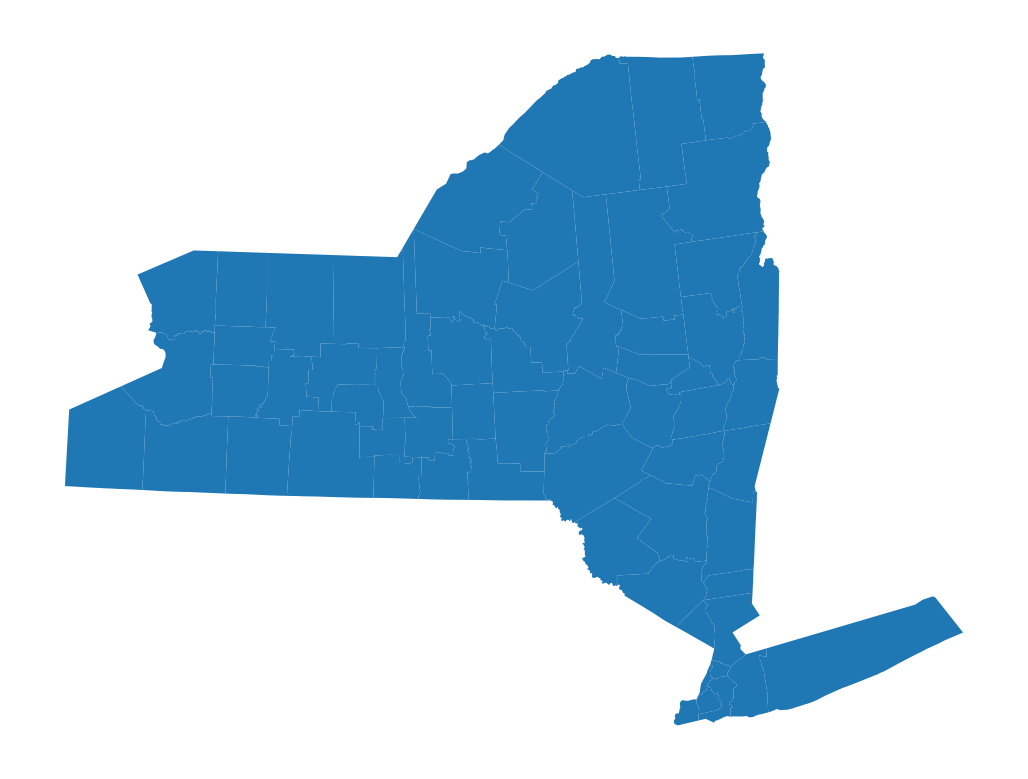

In [ ]:
ny_gdf = gpd.read_file("Counties.shp")
ax = ny_gdf.plot()
ax.axis("off")

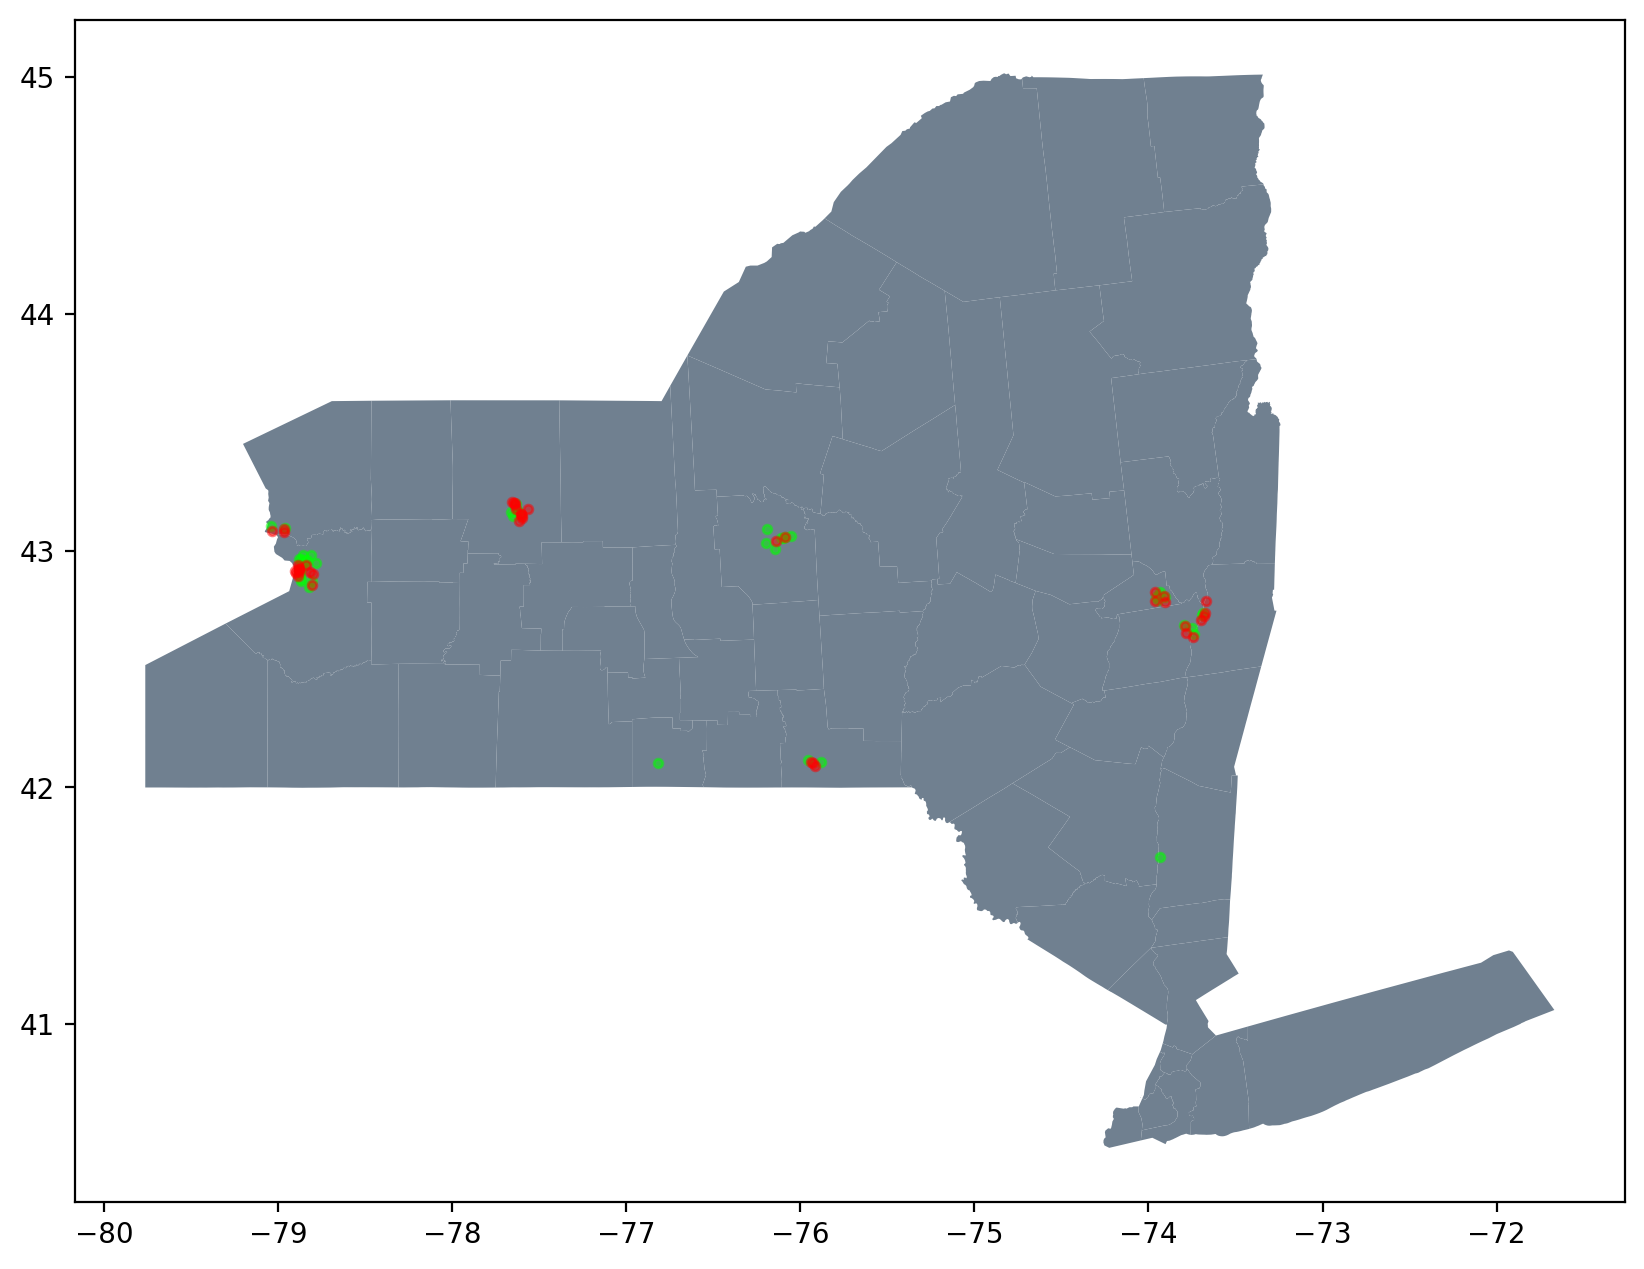

In [ ]:
# Renames the column for merging.
ny_gdf = ny_gdf.rename(columns={"NAME": "County"})
# Makes sure that the data is on a Longitude and Latitude axis.
ny_gdf = ny_gdf.to_crs("EPSG:4326")
# Merges the dispensary/redlining data with the ny shapefile.
hri_disp_shape = pd.merge(joined_gdf_dropped, ny_gdf, on="County")

# Lets us know which geometry to focus on. Since there are two, one focuses on points, the other focuses on the polygons themselves.
hri_disp_point = hri_disp_shape.set_geometry("geometry_x")
hri_disp_point = hri_disp_point.set_crs("EPSG:4326")

ax = ny_gdf.plot(figsize=(10,10),color="slategrey")
hri_disp_point[(hri_disp_point["Operational Status"] == "Active")].plot(figsize=(10,10),ax=ax,color="lime",markersize=10,alpha=0.5)
hri_disp_point[(hri_disp_point["Operational Status"] == "Non-Operational")].plot(figsize=(10,10),ax=ax,color="red",markersize=10,alpha=0.5)

plt.savefig("Redlining_Dispensaries_NY")

In [ ]:
filt_final_disp_gdf = final_disp_gdf
# The "savepoint" is the index at which the latitude and longitude aren't put in correctly.
# Since the latitude is -73 and the longitude is -41, something is off here because this dispensary wouldn't be located in NY.
# Hence, we will drop the data point at row 280 of final_disp_gdf_non_operational.
index = 0
savepoint = 0
for x in filt_final_disp_gdf["Latitude"]:
  if x != None:
    if float(x) < 0:
      savepoint = index
  index += 1
filt_final_disp_gdf = filt_final_disp_gdf.drop(index=filt_final_disp_gdf.iloc[[savepoint]].index)
# final_disp_gdf_non_operational.iloc[savepoint]

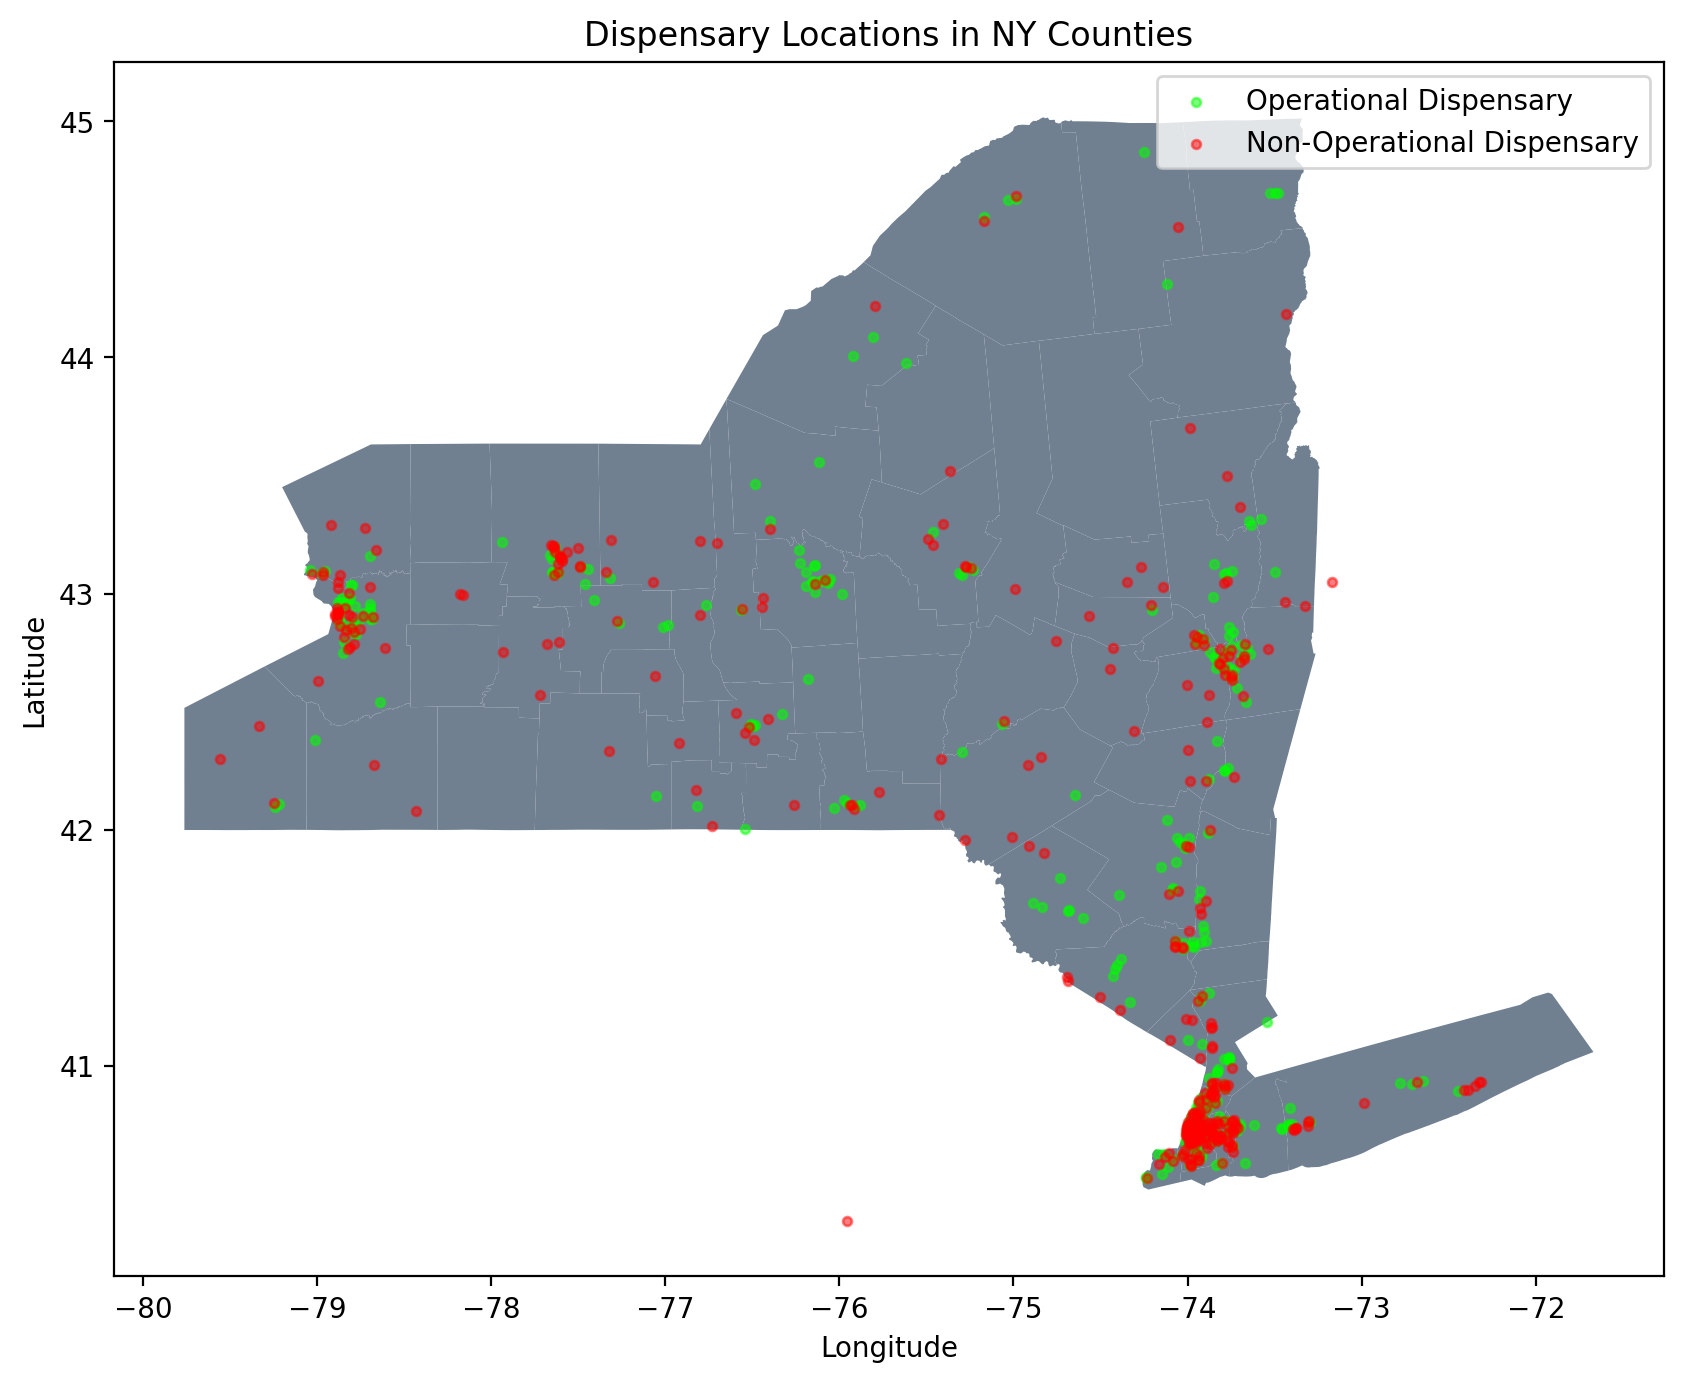

In [ ]:
# Merges the dispensary/redlining data with the ny shapefile.
disp_shape = pd.merge(filt_final_disp_gdf, ny_gdf, on="County")

# Lets us know which geometry to focus on. Since there are two, one focuses on points, the other focuses on the polygons themselves.
disp_point = disp_shape.set_geometry("geometry_x")
disp_point = disp_point.set_crs("EPSG:4326")

ax = ny_gdf.plot(figsize=(10,10),color="slategrey")
disp_point[(disp_point["Operational Status"] == "Active")].plot(figsize=(10,10),ax=ax,color="lime",markersize=10,alpha=0.5,label="Operational Dispensary")
disp_point[(disp_point["Operational Status"] == "Non-Operational")].plot(figsize=(10,10),ax=ax,color="red",markersize=10,alpha=0.5,label="Non-Operational Dispensary")
ax.set_title("Dispensary Locations in NY Counties")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

plt.savefig("Dispensaries_NY")

In [ ]:
# This creates a column for the fips codes for all of the counties.
ny_gdf["COUNTYFP"] = ny_gdf["FIPS_CODE"]
index = 0
for x in ny_gdf["COUNTYFP"]:
  stringx = str(x)
  ny_gdf.iloc[index]
  ny_gdf.loc[index, "COUNTYFP"] = stringx[-3:]
  index += 1

In [ ]:
# This ensures that we're focusing on Buffalo and Niagara county.
# This also merges the two counties together.
buffalo_county_gdf = ny_gdf[ny_gdf.COUNTYFP == "029"]
niagara_count_gdf = ny_gdf[ny_gdf.COUNTYFP == "063"]
buffalo_niagara_gdf = pd.concat([buffalo_county_gdf, niagara_count_gdf], ignore_index=True)

In [ ]:
# Makes sure we're looking at the desired region in the HRI dataset.
buffalo_niagara_hri_gdf = filtered_hri_gdf[filtered_hri_gdf["METRO_NAME"] == "Buffalo-Cheektowaga-Niagara Fa"]

In [ ]:
# This ensures that we're focusing on Buffalo and Niagara county for the dispensaries dataset.
buffalo_disp_gdf = final_disp_gdf[final_disp_gdf["County"] == "Erie"]
niagara_disp_gdf = final_disp_gdf[final_disp_gdf["County"] == "Niagara"]
buffalo_niagara_disp_gdf = pd.concat([buffalo_disp_gdf, niagara_disp_gdf], ignore_index=True)

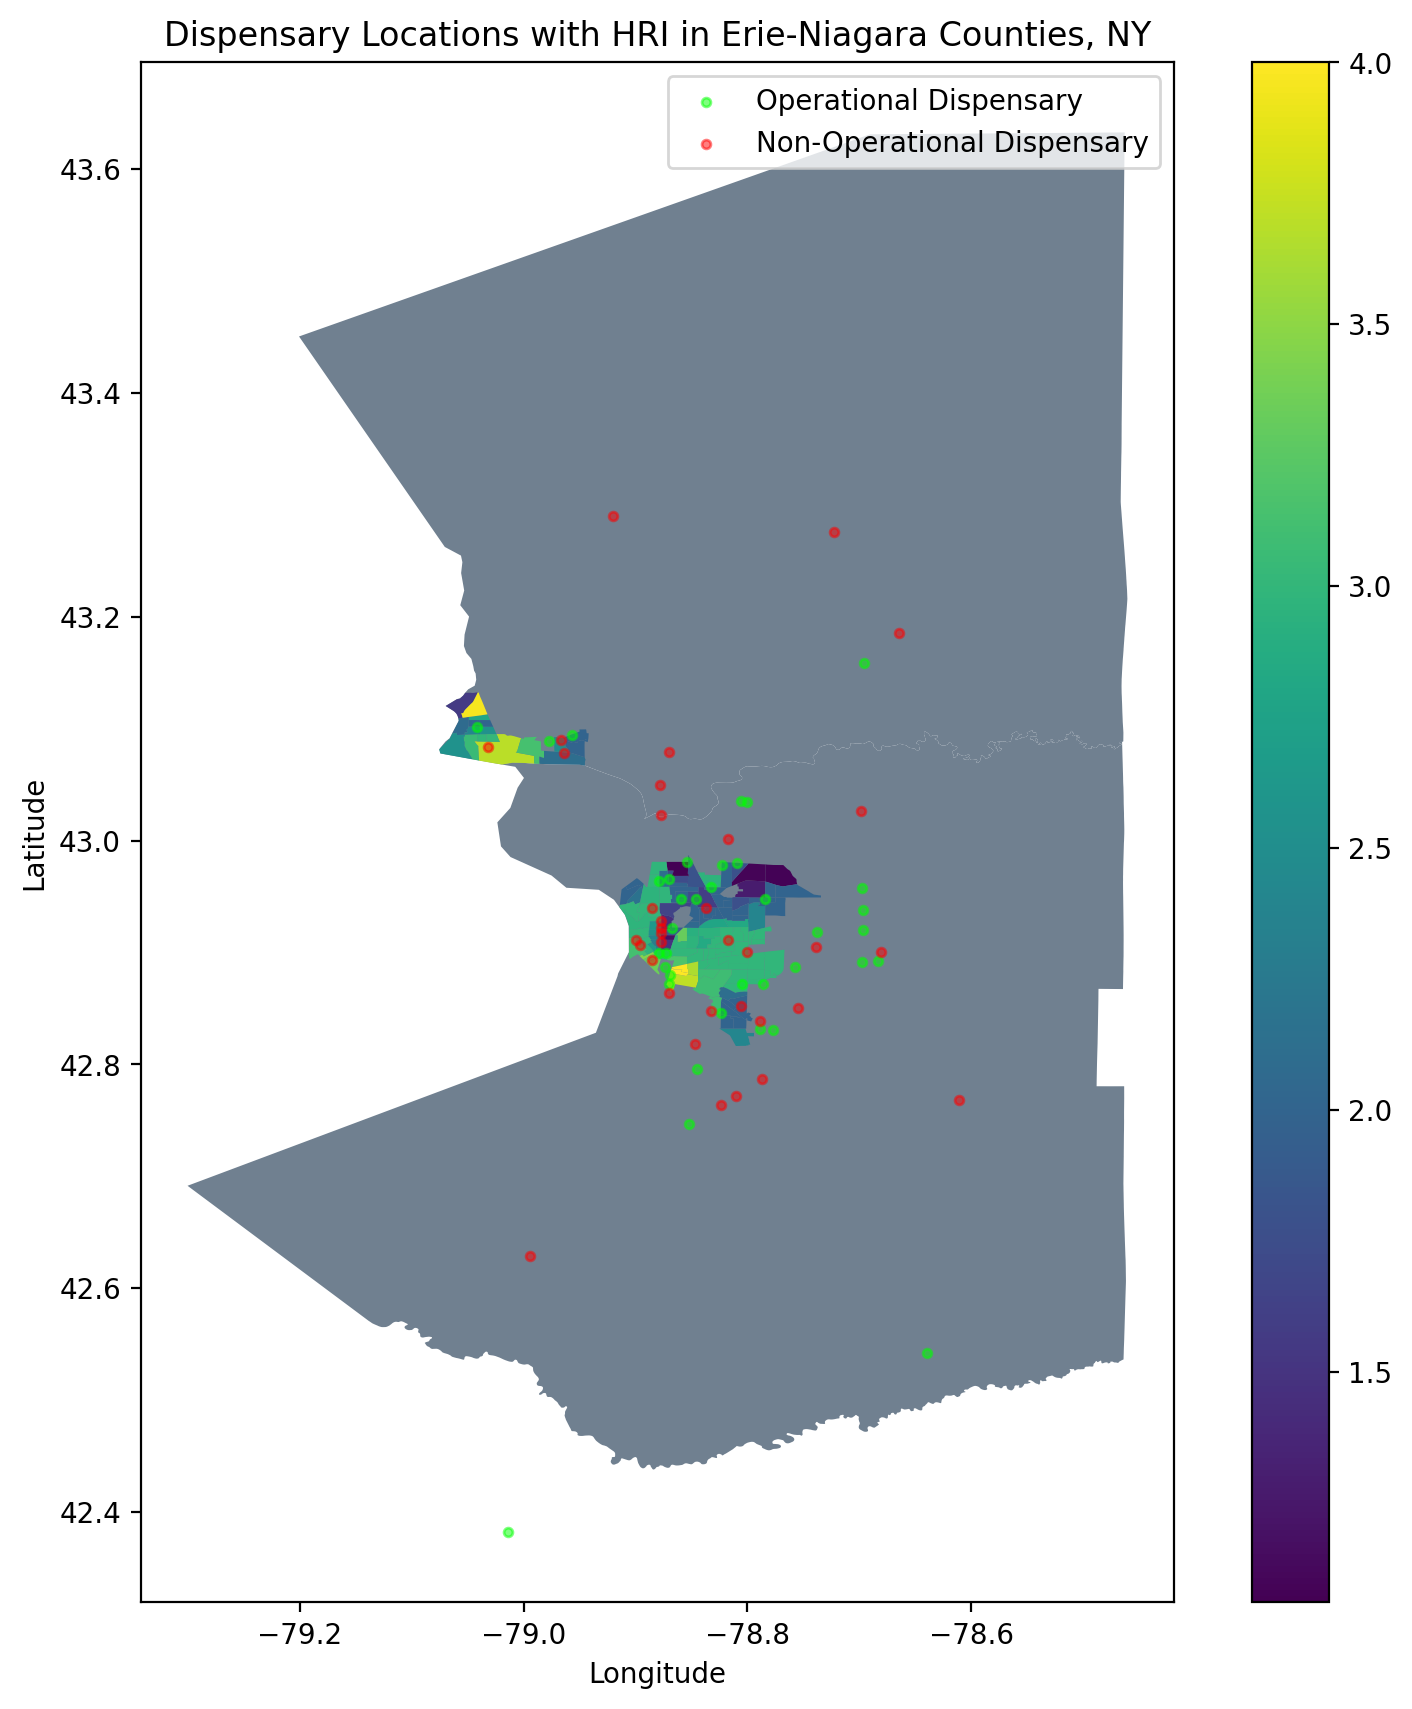

In [ ]:
# Adding in the shapefile.
ax = buffalo_niagara_gdf.plot(figsize=(10,10),color="slategrey")
# Adding in the hri choropleth.
buffalo_niagara_hri_gdf.plot(ax=ax,column="HRI2020",legend=True)
# Adding in the operational and non-operational dispensaries.
buffalo_niagara_disp_gdf[(buffalo_niagara_disp_gdf["Operational Status"] == "Active")].plot(figsize=(10,10),ax=ax,color="lime",markersize=10,alpha=0.5,label="Operational Dispensary")
buffalo_niagara_disp_gdf[(buffalo_niagara_disp_gdf["Operational Status"] == "Non-Operational")].plot(figsize=(10,10),ax=ax,color="red",markersize=10,alpha=0.5,label="Non-Operational Dispensary")

ax.set_title("Dispensary Locations with HRI in Erie-Niagara Counties, NY")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

plt.savefig("Buffalo_Niagara_DispensaryRedlining.png")

In [ ]:
# This ensures that we're focusing on Suffolk county.
suffolk_county_gdf = ny_gdf[ny_gdf.COUNTYFP == "103"]

In [ ]:
# This ensures that we're focusing on Suffolk county for the dispensaries dataset.
suffolk_disp_gdf = final_disp_gdf[final_disp_gdf["County"] == "Suffolk"]

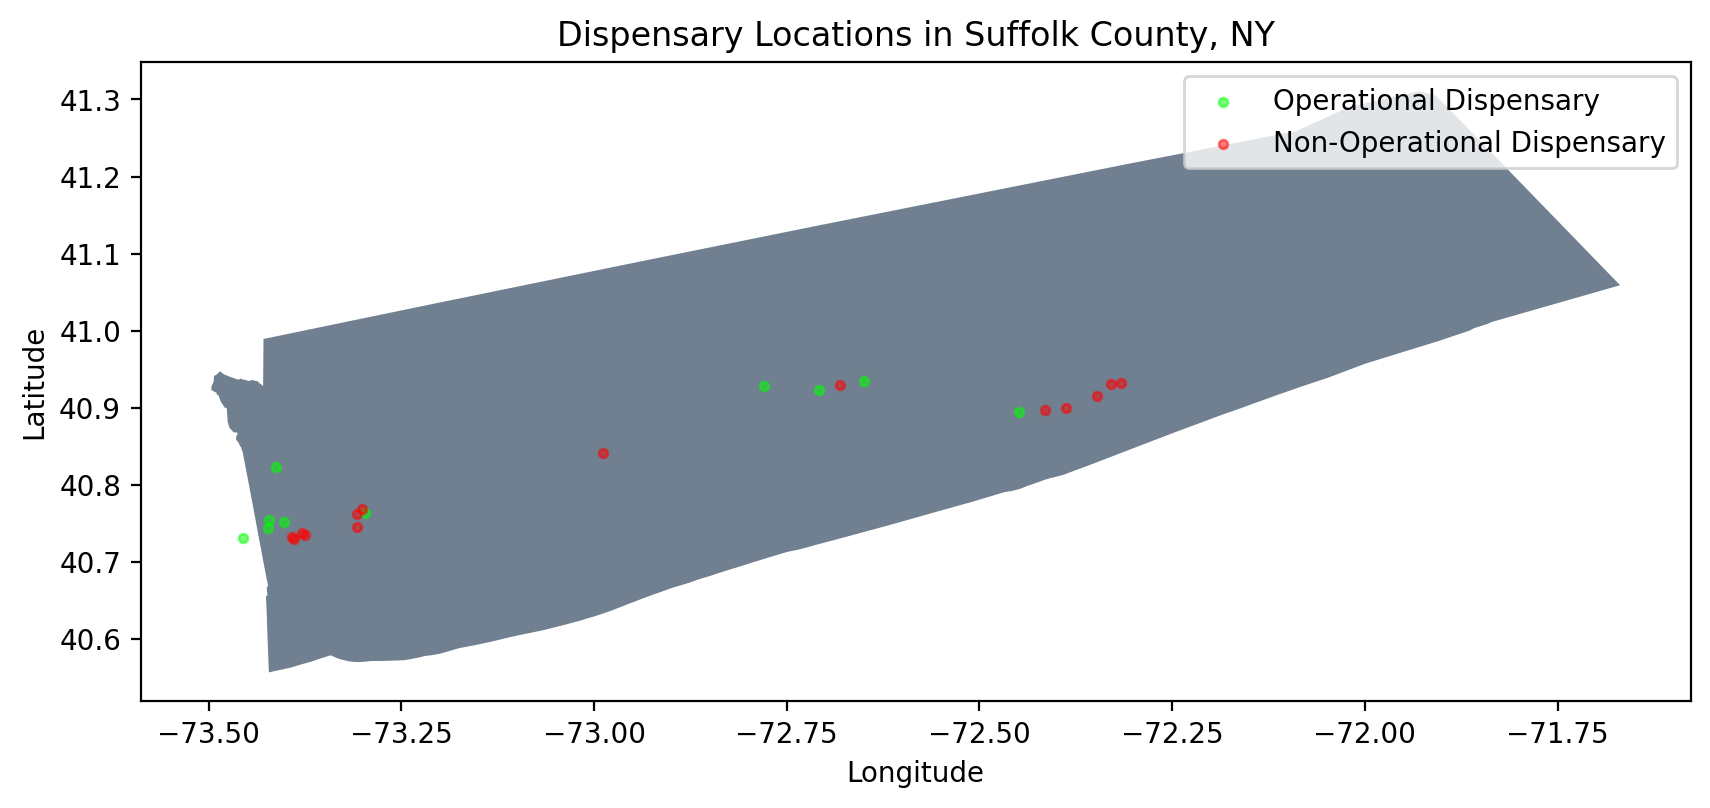

In [ ]:
# Adding in the shapefile.
ax = suffolk_county_gdf.plot(figsize=(10,10),color="slategrey")
# Adding in the operational and non-operational dispensaries.
suffolk_disp_gdf[(suffolk_disp_gdf["Operational Status"] == "Active")].plot(figsize=(10,10),ax=ax,color="lime",markersize=10,alpha=0.5,label="Operational Dispensary")
suffolk_disp_gdf[(suffolk_disp_gdf["Operational Status"] == "Non-Operational")].plot(figsize=(10,10),ax=ax,color="red",markersize=10,alpha=0.5,label="Non-Operational Dispensary")

ax.set_title("Dispensary Locations in Suffolk County, NY")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

plt.savefig("Suffolk_Dispensary.png")

# Prepping for ACS and other comparisons, getting county FIPS codes (Dani)

In [ ]:
# We're going to pull from ACS 5 year estimates, 2019 - 2023. Since NY state OCM was founded in 2021,
# We're going to compare ACS info from 2019 and 2023 (before vs after).

[Scraped FIPS codes](http://unicede.air-worldwide.com/unicede/unicede_new-york_fips_3.html) <-- Generate a dataframe of all NY state county fips code to filter by the applicable counties

In [ ]:
# Need FIPS of NY counties, import that df, then filter, refer to w3 notebook for assistance.

In [ ]:
ny_county_fips_df = pd.read_csv("/content/ny county fips codes (scraped from unicde website with data scraper extension).csv")

In [ ]:
# P-category is fips code, three digits per entry, add zeros in front if need be.
ny_county_fips_df

,p,p 2
0,1,Albany
1,3,Allegany
2,5,Bronx
3,7,Broome
4,9,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# Rename the categories so it's much more clear.
ny_county_fips_df = ny_county_fips_df.rename(columns={"p": "County_FIPS", "p 2": "County_Name"})

In [ ]:
ny_county_fips_df

,County_FIPS,County_Name
0,1,Albany
1,3,Allegany
2,5,Bronx
3,7,Broome
4,9,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# Just to make sure all the fips codes work, use string and zfill to make all fips county codes 3 digits.
ny_county_fips_df['County_FIPS'] = ny_county_fips_df['County_FIPS'].astype(str).str.zfill(3)

In [ ]:
ny_county_fips_df

,County_FIPS,County_Name
0,001,Albany
1,003,Allegany
2,005,Bronx
3,007,Broome
4,009,Cattaraugus
...,...,...
57,115,Washington
58,117,Wayne
59,119,Westchester
60,121,Wyoming


In [ ]:
# This hides the index column.
#print(ny_county_fips_df.to_string(index=False))

In [ ]:
# This drops the city regions from the list of counties.
nyc_counties = ["New York", "Kings", "Bronx", "Richmond", "Queens"]
applicable_fips_df = ny_county_fips_df
for x in nyc_counties:
  applicable_fips_df = applicable_fips_df.drop(applicable_fips_df[applicable_fips_df["County_Name"] == x].index)
applicable_fips_df

,County_FIPS,County_Name
0,001,Albany
1,003,Allegany
3,007,Broome
4,009,Cattaraugus
5,011,Cayuga
6,013,Chautauqua
7,015,Chemung
8,017,Chenango
9,019,Clinton
10,021,Columbia


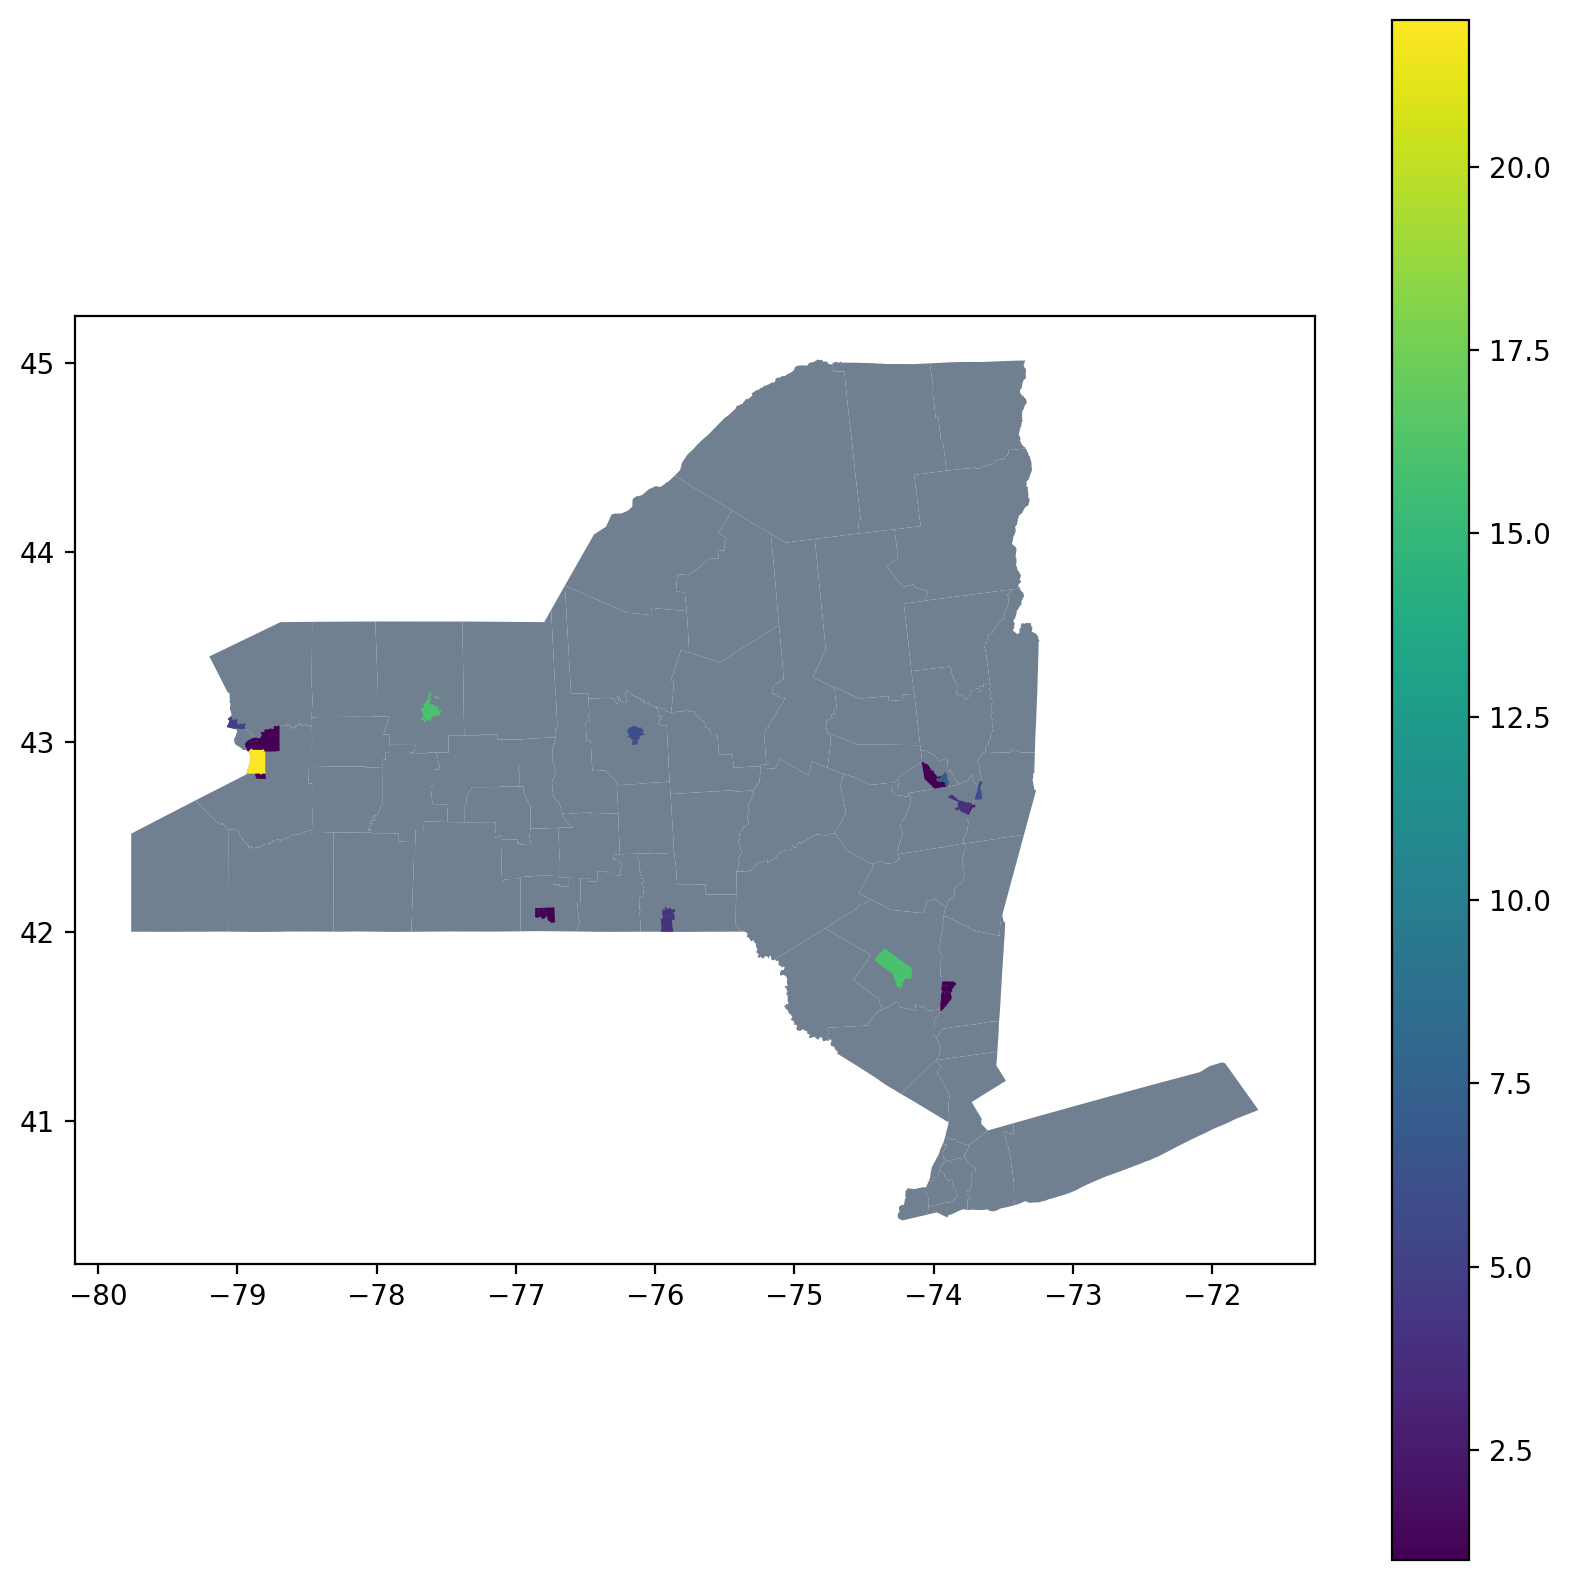

In [ ]:
ny_cities_gdf = gpd.read_file("Cities_Towns.shp")
# Counts all of the dispensaries in each city/town.
disp_num = pd.DataFrame(joined_gdf_dropped[["City"]].groupby("City").size())
disp_num = disp_num.reset_index()
disp_num = disp_num.rename(columns={0: "City_Count"})

ny_cities_gdf = ny_cities_gdf.rename(columns={"NAME": "City"})
disp_num = pd.merge(disp_num, ny_cities_gdf, how="outer")
# Sets the geometry and how I want the map to look like.
disp_num = disp_num.set_geometry("geometry")
disp_num = disp_num.to_crs("EPSG:4326")

ax = ny_gdf.plot(figsize=(10,10),color="slategrey")
disp_num.plot(ax=ax,column="City_Count",figsize=(10,10),legend=True)

plt.savefig("Disp_HRI_CityTown_Choropleth.png")

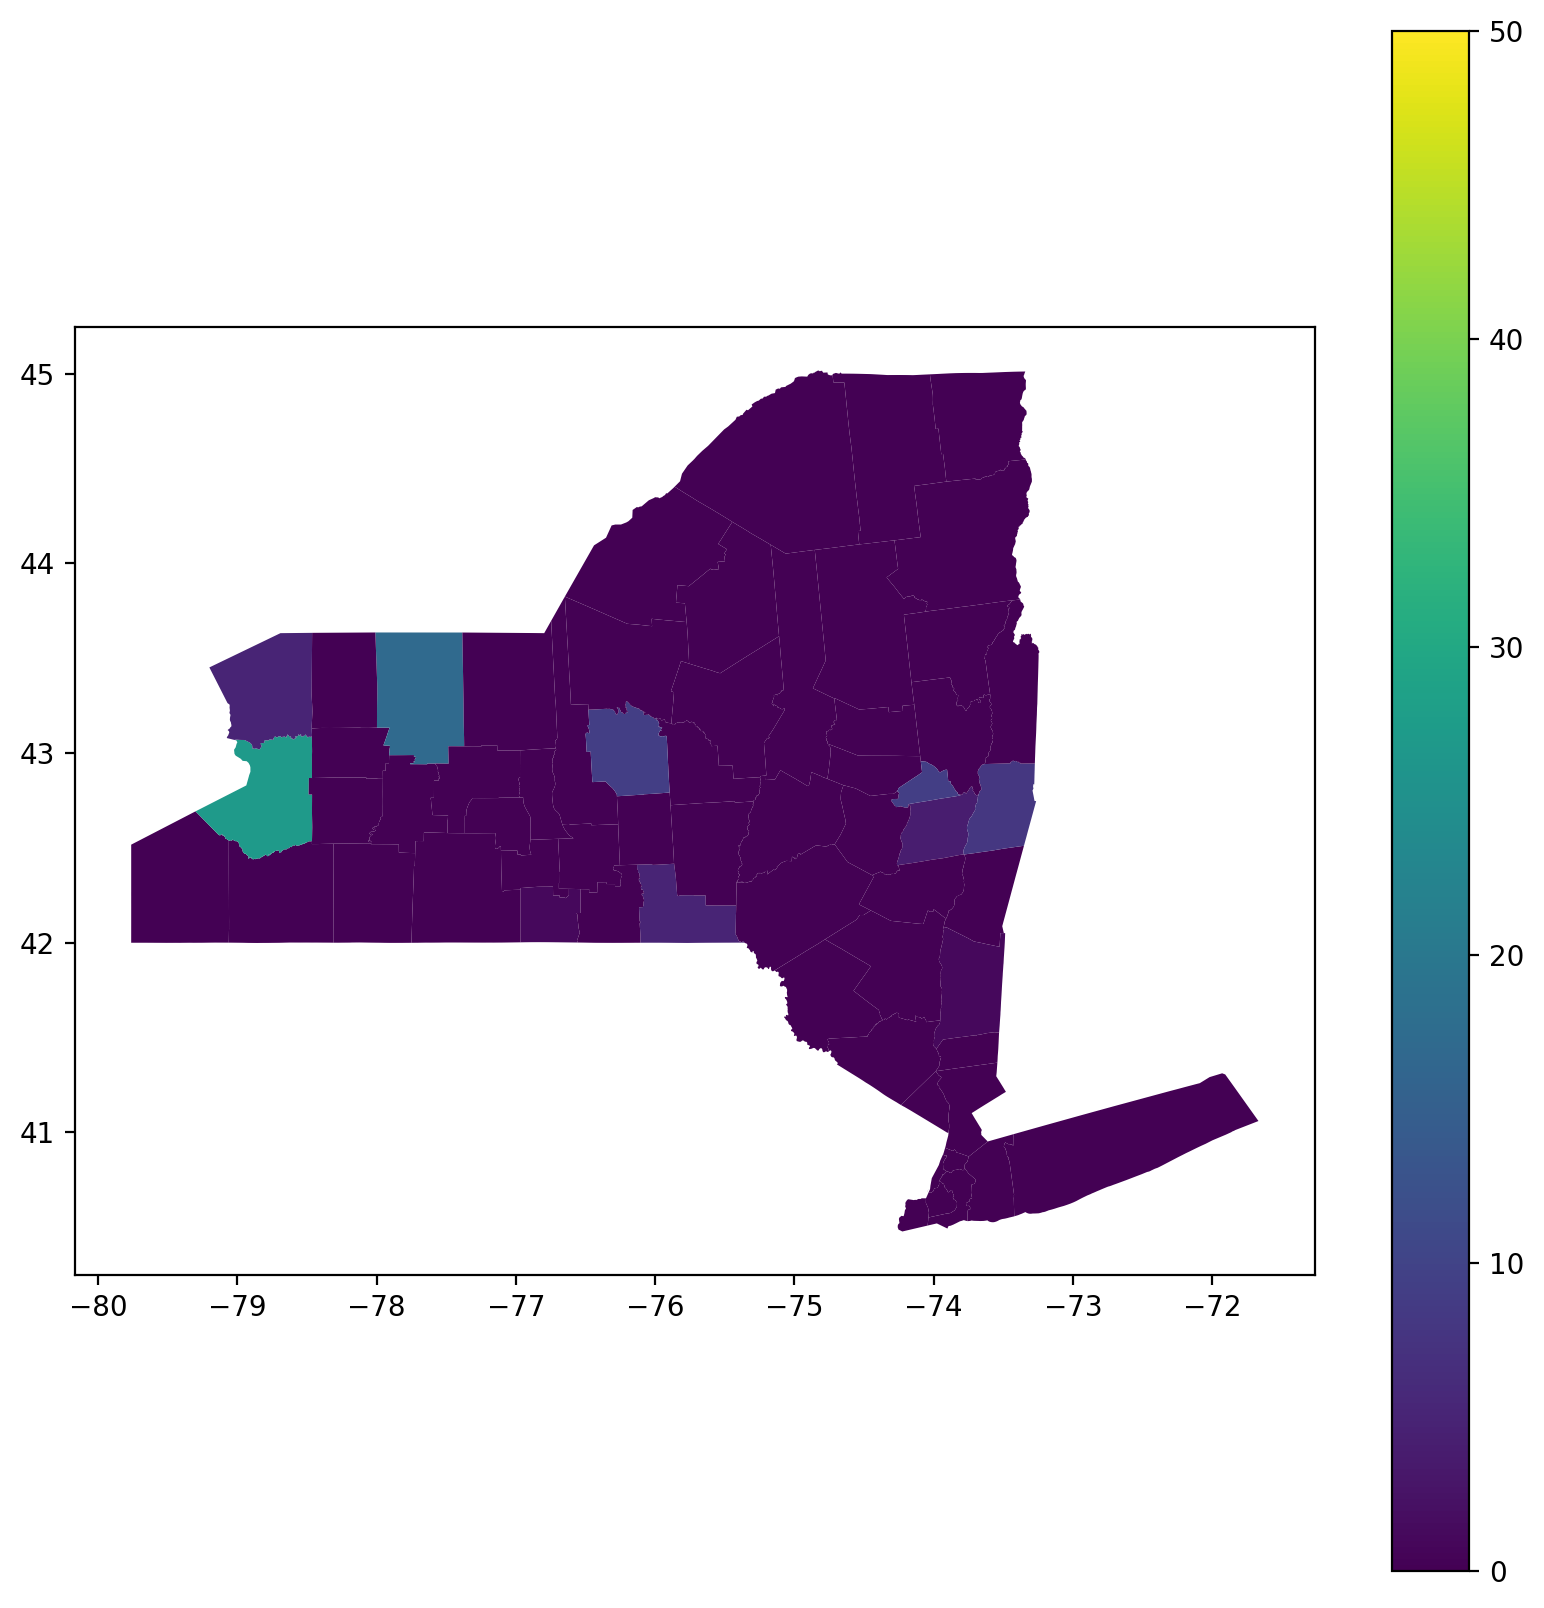

In [ ]:
# Counts all of the dispensaries in each county.
disp_num = pd.DataFrame(joined_gdf_dropped[["County"]].groupby("County").size())
disp_num = disp_num.reset_index()
# Renames a few columns for the merge.
disp_num = disp_num.rename(columns={0: "Disp_Count", "County": "County_Name"})
# Changes "St Lawrence" to "St. Lawrence" for merge consistency.
ny_county_fips_df.loc[44, "County_Name"] = "St Lawrence"
# Merges the NY counties with the number of dispensaries in each counties.
disp_num = pd.merge(disp_num, ny_county_fips_df, on="County_Name", how="outer")
# Fills all na values with 0 so that they're not blank on the map.
disp_num["Disp_Count"] = disp_num["Disp_Count"].fillna(0)

# Renames the columns again so that I could merge disp_num with the ny_gdf.
disp_num = disp_num.rename(columns={"County_Name": "County"})
disp_num = pd.merge(disp_num, ny_gdf)
# Sets the geometry and how I want the map to look like.
disp_num = disp_num.set_geometry("geometry")
disp_num = disp_num.set_crs("EPSG:4326")

# Here, I set a vmax of 50 to better illustrate how many dispensaries are in each county.
disp_num.plot(column="Disp_Count",figsize=(10,10),legend=True,vmax=50)

plt.savefig("Disp_HRI_Choropleth.png")

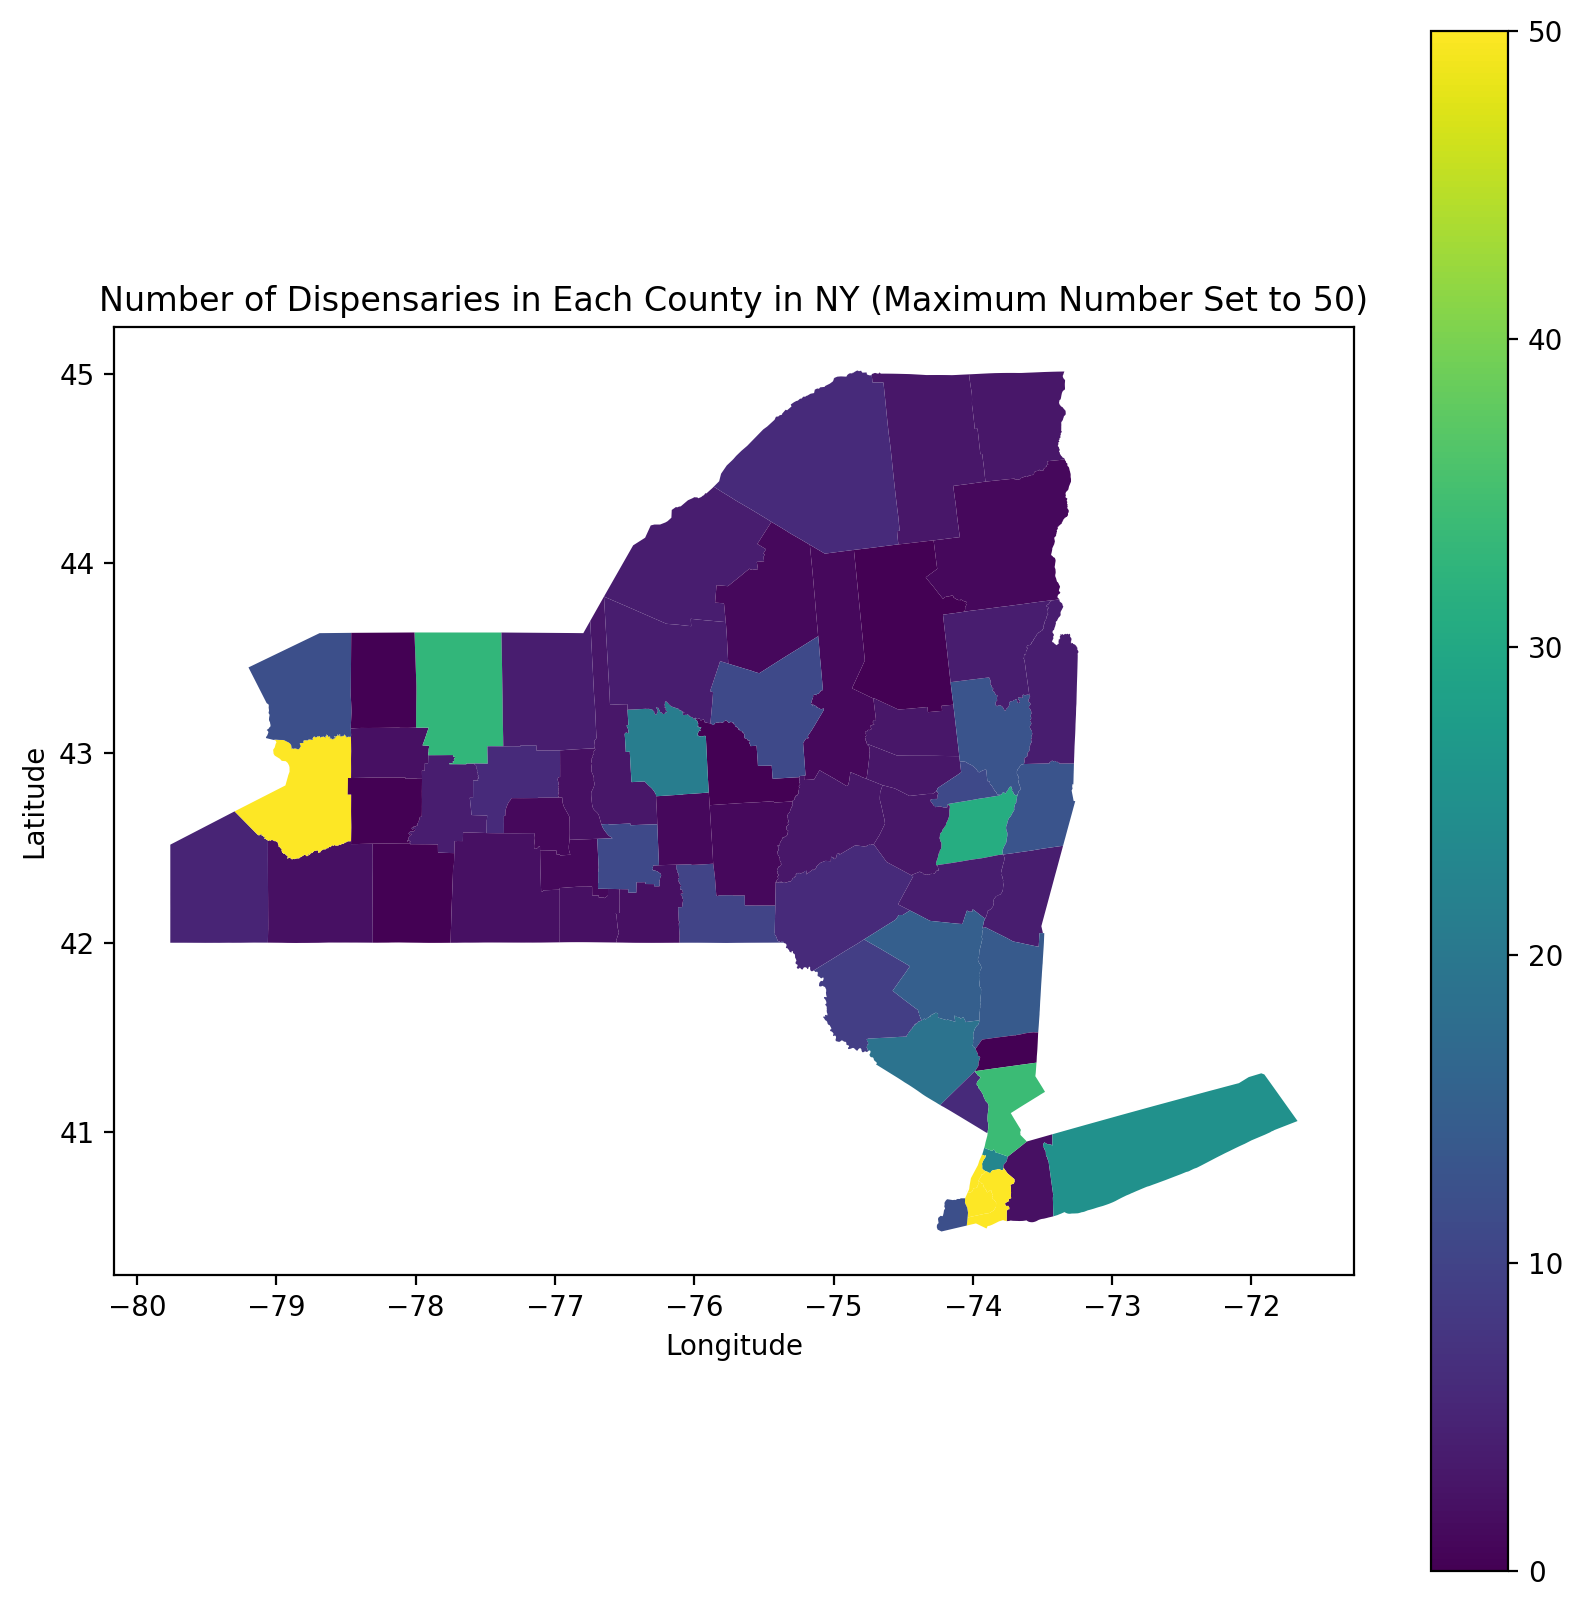

In [ ]:
# Counts all of the dispensaries in each county.
disp_num = pd.DataFrame(filt_final_disp_gdf[["County"]].groupby("County").size())
disp_num = disp_num.reset_index()
# Renames a few columns for the merge.
disp_num = disp_num.rename(columns={0: "Disp_Count", "County": "County_Name"})
# Changes "St Lawrence" to "St. Lawrence" for merge consistency.
ny_county_fips_df.loc[44, "County_Name"] = "St Lawrence"
# Merges the NY counties with the number of dispensaries in each counties.
disp_num = pd.merge(disp_num, ny_county_fips_df, on="County_Name", how="outer")
# Fills all na values with 0 so that they're not blank on the map.
disp_num["Disp_Count"] = disp_num["Disp_Count"].fillna(0)

# Renames the columns again so that I could merge disp_num with the ny_gdf.
disp_num = disp_num.rename(columns={"County_Name": "County"})
disp_num = pd.merge(disp_num, ny_gdf)
# Sets the geometry and how I want the map to look like.
disp_num = disp_num.set_geometry("geometry")
disp_num = disp_num.set_crs("EPSG:4326")

# Here, I set a vmax of 50 to better illustrate how many dispensaries are in each county.
disp_num.plot(column="Disp_Count",figsize=(10,10),legend=True,vmax=50)

plt.title("Number of Dispensaries in Each County in NY (Maximum Number Set to 50)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig("Disp_Chloropleth.png")

## ACS Data (Izabela mostly, partly Dani)

Now returning to the ACS data, we will specify 5-year PUMS data.

**2023 ACS Data**

In [ ]:
# This gathers all of the data that we want to look into.
acs_cols = [
    "B01003_001E", # Total population
    "B25077_001E", # Median value of housing units in dollars (the value is the respondent's estimate of how much the property would sell for if it were for sale)

    "B19059_002E", # Population of people with retirement income in the past 12 months
    "B19059_003E", # Population of people without retirement income in the past 12 months

    "B02001_002E", # Population of White people
    "B02001_003E", # Population of Black/African American people
    "B02001_004E", # Population of American Indian/Alaska Native people
    "B02001_005E", # Population of Asian people
    "B02001_006E", # Population of Native Hawaiian/Other Pacific Islander people
    "B02001_007E", # Population of Other
    "B02001_008E", # Population of Two or More Races
    "B02001_009E", # Population of Two Races including Some Other Race
    "B02001_010E", # Population of Two Races excluding Some Other Race, and Three or More Races
    "B03003_003E", # Hispanic or Latino origin

    "B99233_003E", # Allocated usual hours worked per week in the past 12 months 16+
    "B99233_004E", # Non-Allocated usual hours worked per week in the past 12 months 16+

    "B15003_017E", # HS Diploma (Educational attainment for the population 25 years and over)
    "B15003_018E", # GED (Educational attainment for the population 25 years and over)
    "B15003_021E", # Associate's Degree (Educational attainment for the population 25 years and over)
    "B15003_022E", # Bachelor's Degree (Educational attainment for the population 25 years and over)
    "B15003_023E", # Master's Degree (Educational attainment for the population 25 years and over)
    "B15003_024E", # Professional School Degree (Educational attainment for the population 25 years and over)
    "B15003_025E", # Doctorate Degree (Educational attainment for the population 25 years and over)

    "C17002_002E", # Under 0.50 income-to-poverty ratio in the past 12 months
    "C17002_003E", # Between 0.50 to 0.99 income-to-poverty ratio in the past 12 months
    "C17002_004E", # Between 1.00 to 1.24 income-to-poverty ratio in the past 12 months
    "C17002_005E", # Between 1.25 to 1.49 income-to-poverty ratio in the past 12 months
    "C17002_006E", # Between 1.50 to 1.84 income-to-poverty ratio in the past 12 months
    "C17002_007E", # Between 1.85 to 1.99 income-to-poverty ratio in the past 12 months
    "C17002_008E", # 2.00 and over income-to-poverty ratio in the past 12 months
]
acs_colnames = [
    "TOTPOP", # Total population
    "HOMEMED", # Median value of housing units in dollars (the value is the respondent's estimate of how much the property would sell for if it were for sale)

    "RETINC", # Population of people with retirement income in the past 12 months
    "NORETINC", # Population of people without retirement income in the past 12 months

    "WHITE", # Population of White people
    "BLACK", # Population of Black/African American people
    "AMIN", # Population of American Indian/Alaska Native people
    "ASIAN", # Population of Asian people
    "NHPI", # Population of Native Hawaiian/Other Pacific Islander people
    "OTHER", # Population of Other
    "TWO_OR_MORE", # Population of Two or More Races
    "TWO_AND_SOME_OTHER", # Population of Two Races including Some Other Race
    "TWO_WO_SOMEOTHER_AND_THREEORMORE", # Population of Two Races excluding Some Other Race, and Three or More Races
    "HISP", # Hispanic or Latino origin

    "ALLWORK", # Allocated usual hours worked per week in the past 12 months 16+
    "NONALLWORK", # Non-Allocated usual hours worked per week in the past 12 months 16+

    "HS_SCHL", # HS Diploma (Educational attainment for the population 25 years and over)
    "GED_SCHL", # GED (Educational attainment for the population 25 years and over)
    "ASSOC_SCHL", # Associate's Degree (Educational attainment for the population 25 years and over)
    "BACH_SCHL", # Bachelor's Degree (Educational attainment for the population 25 years and over)
    "MAS_SCHL", # Master's Degree (Educational attainment for the population 25 years and over)
    "PROF_SCHL", # Professional School Degree (Educational attainment for the population 25 years and over)
    "DOC_SCHL", # Doctorate Degree (Educational attainment for the population 25 years and over)

    "POV_BEL_0.50", # Under 0.50 income-to-poverty ratio in the past 12 months
    "POV_BET_0.50_0.99", # Between 0.50 to 0.99 income-to-poverty ratio in the past 12 months
    "POV_BET_1.00_1.24", # Between 1.00 to 1.24 income-to-poverty ratio in the past 12 months
    "POV_BET_1.25_1.49", # Between 1.25 to 1.49 income-to-poverty ratio in the past 12 months
    "POV_BET_1.50_1.84", # Between 1.50 to 1.84 income-to-poverty ratio in the past 12 months
    "POV_BET_1.85_1.99", # Between 1.85 to 1.99 income-to-poverty ratio in the past 12 months
    "POV_ABV_2.00", # 2.00 and over income-to-poverty ratio in the past 12 months
]

In [ ]:
# Turns the FIPS codes of every non-city county into a list.
#county_fips = applicable_fips_df['County_FIPS'].tolist()

In [ ]:
acs_df = pd.DataFrame(
    census.acs5.get(
        tuple(acs_cols),
        geo={
            "for": "county:*",
            "in": "state:36",
        },
        year=2023,
    )
)

In [ ]:
acs23_df_clean = acs_df.rename(
    columns={x: y for x, y in zip(acs_cols, acs_colnames)}
)
acs23_df_clean["GEOID20"] = (
    acs23_df_clean["state"] + acs23_df_clean["county"]
).astype(int)
acs23_df_clean.set_index("GEOID20", inplace=True)
acs23_df_clean.head()

,TOTPOP,HOMEMED,RETINC,NORETINC,WHITE,BLACK,AMIN,ASIAN,NHPI,OTHER,...,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state,county
GEOID20,,,,,,,,,,,,,,,,,,,,,
36001,315374.0,277400.0,39109.0,93619.0,223239.0,38696.0,238.0,22969.0,187.0,8010.0,...,5987.0,21113.0,17587.0,9417.0,6841.0,11955.0,6202.0,226464.0,36,001
36003,47027.0,97900.0,5646.0,11411.0,44094.0,801.0,82.0,627.0,26.0,392.0,...,446.0,3717.0,3378.0,1720.0,2005.0,2549.0,1410.0,27454.0,36,003
36005,1419250.0,517000.0,88939.0,441128.0,223793.0,484151.0,16746.0,57790.0,2094.0,451233.0,...,6054.0,188999.0,185139.0,83139.0,77734.0,101883.0,37079.0,714441.0,36,005
36007,197738.0,145100.0,26193.0,55588.0,161027.0,10789.0,273.0,9873.0,92.0,3918.0,...,2357.0,18926.0,16522.0,7993.0,6899.0,10738.0,5016.0,121197.0,36,007
36009,76479.0,109400.0,9666.0,22156.0,68357.0,1125.0,2013.0,555.0,0.0,710.0,...,470.0,5673.0,7366.0,3709.0,3562.0,6125.0,2242.0,45417.0,36,009


In [ ]:
# Renames the "county" column to "County".
acs23_df_clean = acs23_df_clean.rename(columns={"county": "County"})

In [ ]:
applicable_fips_df = applicable_fips_df.reset_index()

In [ ]:
# This creates a dictionary with EVERY (city and non-city) FIPS code.
# The keys are the FIPS codes and the values are the city names.
FIPS_to_Names = {}
index = 0
for x in ny_county_fips_df["County_FIPS"]:
  FIPS_to_Names[x] = ny_county_fips_df.loc[index, "County_Name"]
  index += 1
print(FIPS_to_Names)

{'001': 'Albany', '003': 'Allegany', '005': 'Bronx', '007': 'Broome', '009': 'Cattaraugus', '011': 'Cayuga', '013': 'Chautauqua', '015': 'Chemung', '017': 'Chenango', '019': 'Clinton', '021': 'Columbia', '023': 'Cortland', '025': 'Delaware', '027': 'Dutchess', '029': 'Erie', '031': 'Essex', '033': 'Franklin', '035': 'Fulton', '037': 'Genesee', '039': 'Greene', '041': 'Hamilton', '043': 'Herkimer', '045': 'Jefferson', '047': 'Kings', '049': 'Lewis', '051': 'Livingston', '053': 'Madison', '055': 'Monroe', '057': 'Montgomery', '059': 'Nassau', '061': 'New York', '063': 'Niagara', '065': 'Oneida', '067': 'Onondaga', '069': 'Ontario', '071': 'Orange', '073': 'Orleans', '075': 'Oswego', '077': 'Otsego', '079': 'Putnam', '081': 'Queens', '083': 'Rensselaer', '085': 'Richmond', '087': 'Rockland', '089': 'St. Lawrence', '091': 'Saratoga', '093': 'Schenectady', '095': 'Schoharie', '097': 'Schuyler', '099': 'Seneca', '101': 'Steuben', '103': 'Suffolk', '105': 'Sullivan', '107': 'Tioga', '109': 'T

In [ ]:
# This renames all of the FIPS codes to county names in the ACS data.
for x in acs23_df_clean["County"]:
  for y in FIPS_to_Names:
    if x == y:
      acs23_df_clean["County"] = acs23_df_clean["County"].replace(x, FIPS_to_Names[y])
acs23_df_clean

,TOTPOP,HOMEMED,RETINC,NORETINC,WHITE,BLACK,AMIN,ASIAN,NHPI,OTHER,...,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state,County
GEOID20,,,,,,,,,,,,,,,,,,,,,
36001,315374.0,277400.0,39109.0,93619.0,223239.0,38696.0,238.0,22969.0,187.0,8010.0,...,5987.0,21113.0,17587.0,9417.0,6841.0,11955.0,6202.0,226464.0,36,Albany
36003,47027.0,97900.0,5646.0,11411.0,44094.0,801.0,82.0,627.0,26.0,392.0,...,446.0,3717.0,3378.0,1720.0,2005.0,2549.0,1410.0,27454.0,36,Allegany
36005,1419250.0,517000.0,88939.0,441128.0,223793.0,484151.0,16746.0,57790.0,2094.0,451233.0,...,6054.0,188999.0,185139.0,83139.0,77734.0,101883.0,37079.0,714441.0,36,Bronx
36007,197738.0,145100.0,26193.0,55588.0,161027.0,10789.0,273.0,9873.0,92.0,3918.0,...,2357.0,18926.0,16522.0,7993.0,6899.0,10738.0,5016.0,121197.0,36,Broome
36009,76479.0,109400.0,9666.0,22156.0,68357.0,1125.0,2013.0,555.0,0.0,710.0,...,470.0,5673.0,7366.0,3709.0,3562.0,6125.0,2242.0,45417.0,36,Cattaraugus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36115,60883.0,185000.0,7325.0,16929.0,55130.0,1504.0,44.0,376.0,20.0,1224.0,...,316.0,2465.0,3839.0,1410.0,2882.0,3302.0,2096.0,42160.0,36,Washington
36117,91128.0,163400.0,12095.0,26127.0,80916.0,2164.0,285.0,788.0,37.0,1811.0,...,349.0,5057.0,5117.0,3853.0,2781.0,4678.0,2655.0,66133.0,36,Wayne
36119,996888.0,638400.0,94894.0,275362.0,545304.0,139205.0,5191.0,61001.0,158.0,133034.0,...,17361.0,45029.0,41641.0,22235.0,26599.0,35057.0,15953.0,789593.0,36,Westchester


In [ ]:
# Ensures that we aren't using any city counties. (Gets rid of them from the ACS data).
nyc_counties = ["New York", "Kings", "Bronx", "Richmond", "Queens"]
for x in nyc_counties:
  acs23_df_clean = acs23_df_clean.drop(acs23_df_clean[acs23_df_clean["County"] == x].index)

In [ ]:
# Merges the dispensary data and the ACS data together.
disp_acs23_mgd_gdf = pd.merge(final_disp_gdf, acs23_df_clean)
disp_acs23_mgd_gdf

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,PROF_SCHL,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state
0,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,4341.0,3248.0,24805.0,26433.0,15316.0,12616.0,17856.0,8335.0,290041.0,36
1,OCM-RETL-24-000138,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/16/2024 12:00:00 AM,07/16/2024 12:00:00 AM,07/16/2026 12:00:00 AM,NaN,1650 CRANE STREET DISPENSARY LLC,...,2568.0,2043.0,10268.0,9116.0,5306.0,4615.0,7721.0,3017.0,115416.0,36
2,OCM-RETL-24-000081,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,NaN,1WILDE1 LLC,...,2199.0,1875.0,7642.0,10535.0,4504.0,4651.0,6325.0,3479.0,117117.0,36
3,OCM-RETL-24-000267,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,12/19/2024 12:00:00 AM,12/19/2024 12:00:00 AM,12/19/2026 12:00:00 AM,NaN,296 Retail Venture LLC,...,7504.0,3452.0,23710.0,28259.0,12396.0,12144.0,15067.0,7342.0,235177.0,36
4,OCM-RETL-24-000082,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,"Minority-Owned Business, Women-Owned Business",3807 harlem Cannabis LLC,...,16213.0,12611.0,63494.0,66515.0,37091.0,34324.0,45440.0,21210.0,659001.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,OCM-CAURD-24-000138,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/03/2024 12:00:00 AM,05/03/2024 12:00:00 AM,05/03/2026 12:00:00 AM,NaN,Valley Greens Ltd.,...,41760.0,17361.0,45029.0,41641.0,22235.0,26599.0,35057.0,15953.0,789593.0,36
436,OCM-CAURD-24-000198,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/23/2024 12:00:00 AM,08/23/2024 12:00:00 AM,08/23/2026 12:00:00 AM,NaN,Vedaleaf LLC,...,8428.0,5687.0,33571.0,29313.0,16711.0,18561.0,21255.0,11021.0,321005.0,36
437,OCM-CAURD-24-000124,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,04/12/2024 12:00:00 AM,04/12/2024 12:00:00 AM,04/12/2026 12:00:00 AM,NaN,Westchester Harvesting Company LLC,...,41760.0,17361.0,45029.0,41641.0,22235.0,26599.0,35057.0,15953.0,789593.0,36
438,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,2085.0,7150.0,9427.0,4120.0,2541.0,2519.0,5028.0,2168.0,62792.0,36


In [ ]:
# The merged dispensary, HRI, and ACS data.
hri_disp_acs23_mgd_gdf = pd.merge(joined_gdf_dropped, acs23_df_clean)

**2019 ACS Data**

In [ ]:
#apply these variables and run  # Changed the variable name to 'B17020_002E', which represents the 'Income In The Past 12 Months Below Poverty Level' field in the 2019 ACS 5-year data.


In [ ]:
acs_df = pd.DataFrame(
    census.acs5.get(
        tuple(acs_cols),
        geo={
            "for": "county:*",
            "in": "state:36",
        },
        year=2019,
    )
)

In [ ]:
acs19_df_clean = acs_df.rename(
    columns={x: y for x, y in zip(acs_cols, acs_colnames)}
)
acs19_df_clean["GEOID10"] = (
    acs19_df_clean["state"] + acs19_df_clean["county"]
).astype(int)
acs19_df_clean.set_index("GEOID10", inplace=True)
acs19_df_clean.head()

,TOTPOP,HOMEMED,RETINC,NORETINC,WHITE,BLACK,AMIN,ASIAN,NHPI,OTHER,...,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state,county
GEOID10,,,,,,,,,,,,,,,,,,,,,
36095,31222.0,144800.0,3642.0,8917.0,29791.0,496.0,48.0,281.0,9.0,170.0,...,171.0,1754.0,1858.0,1671.0,980.0,1722.0,488.0,21369.0,36,095
36035,53646.0,109600.0,5181.0,17376.0,50640.0,1119.0,209.0,417.0,7.0,444.0,...,114.0,3368.0,4446.0,2935.0,2338.0,4763.0,1505.0,33080.0,36,035
36083,159185.0,188700.0,16698.0,48208.0,137002.0,10268.0,228.0,4282.0,13.0,1675.0,...,1506.0,8885.0,9078.0,5142.0,4441.0,7341.0,3241.0,115287.0,36,083
36033,50477.0,108700.0,5503.0,13512.0,41726.0,2863.0,3609.0,280.0,111.0,1057.0,...,187.0,3948.0,4033.0,2340.0,1775.0,3675.0,1244.0,27875.0,36,033
36081,2287388.0,543800.0,124749.0,654183.0,875191.0,418429.0,10326.0,583459.0,1078.0,316141.0,...,16075.0,113970.0,162477.0,104435.0,104862.0,154683.0,60151.0,1559361.0,36,081


In [ ]:
# Renames the "county" column to "County".
acs19_df_clean = acs19_df_clean.rename(columns={"county": "County"})

In [ ]:
# This renames all of the FIPS codes to county names in the ACS data.
for x in acs19_df_clean["County"]:
  for y in FIPS_to_Names:
    if x == y:
      acs19_df_clean["County"] = acs19_df_clean["County"].replace(x, FIPS_to_Names[y])
acs19_df_clean

,TOTPOP,HOMEMED,RETINC,NORETINC,WHITE,BLACK,AMIN,ASIAN,NHPI,OTHER,...,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state,County
GEOID10,,,,,,,,,,,,,,,,,,,,,
36095,31222.0,144800.0,3642.0,8917.0,29791.0,496.0,48.0,281.0,9.0,170.0,...,171.0,1754.0,1858.0,1671.0,980.0,1722.0,488.0,21369.0,36,Schoharie
36035,53646.0,109600.0,5181.0,17376.0,50640.0,1119.0,209.0,417.0,7.0,444.0,...,114.0,3368.0,4446.0,2935.0,2338.0,4763.0,1505.0,33080.0,36,Fulton
36083,159185.0,188700.0,16698.0,48208.0,137002.0,10268.0,228.0,4282.0,13.0,1675.0,...,1506.0,8885.0,9078.0,5142.0,4441.0,7341.0,3241.0,115287.0,36,Rensselaer
36033,50477.0,108700.0,5503.0,13512.0,41726.0,2863.0,3609.0,280.0,111.0,1057.0,...,187.0,3948.0,4033.0,2340.0,1775.0,3675.0,1244.0,27875.0,36,Franklin
36081,2287388.0,543800.0,124749.0,654183.0,875191.0,418429.0,10326.0,583459.0,1078.0,316141.0,...,16075.0,113970.0,162477.0,104435.0,104862.0,154683.0,60151.0,1559361.0,36,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36009,77121.0,88100.0,8256.0,23523.0,70859.0,1116.0,2485.0,610.0,0.0,470.0,...,329.0,4960.0,7364.0,4653.0,4043.0,5450.0,2376.0,45833.0,36,Cattaraugus
36053,71205.0,136800.0,6577.0,19300.0,67360.0,1268.0,339.0,638.0,79.0,309.0,...,586.0,3089.0,3370.0,2655.0,2990.0,3390.0,2171.0,48392.0,36,Madison
36093,154859.0,169600.0,14009.0,40293.0,118130.0,15590.0,359.0,7228.0,84.0,6079.0,...,2080.0,7233.0,10038.0,5597.0,4944.0,8566.0,2407.0,112062.0,36,Schenectady


In [ ]:
# Ensures that we aren't using any city counties. (Gets rid of them from the ACS data).
nyc_counties = ["New York", "Kings", "Bronx", "Richmond", "Queens"]
for x in nyc_counties:
  acs19_df_clean = acs19_df_clean.drop(acs19_df_clean[acs19_df_clean["County"] == x].index)

In [ ]:
# Merges the dispensary data and the ACS data together.
disp_acs19_mgd_gdf = pd.merge(final_disp_gdf, acs19_df_clean)
disp_acs19_mgd_gdf

,License Number,License Type,License Type Code,License Status,License Status Code,Issued Date,Effective Date,Expiration Date,SEE Category,Entity Name,...,PROF_SCHL,DOC_SCHL,POV_BEL_0.50,POV_BET_0.50_0.99,POV_BET_1.00_1.24,POV_BET_1.25_1.49,POV_BET_1.50_1.84,POV_BET_1.85_1.99,POV_ABV_2.00,state
0,OCM-RETL-24-000123,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/10/2024 12:00:00 AM,07/10/2024 12:00:00 AM,07/10/2026 12:00:00 AM,NaN,10415 Jamaica LLC,...,3806.0,2427.0,19745.0,23397.0,13057.0,12381.0,18707.0,8102.0,274953.0,36
1,OCM-RETL-24-000138,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,07/16/2024 12:00:00 AM,07/16/2024 12:00:00 AM,07/16/2026 12:00:00 AM,NaN,1650 CRANE STREET DISPENSARY LLC,...,1739.0,2080.0,7233.0,10038.0,5597.0,4944.0,8566.0,2407.0,112062.0,36
2,OCM-RETL-24-000081,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,NaN,1WILDE1 LLC,...,2191.0,1506.0,8885.0,9078.0,5142.0,4441.0,7341.0,3241.0,115287.0,36
3,OCM-RETL-24-000267,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,12/19/2024 12:00:00 AM,12/19/2024 12:00:00 AM,12/19/2026 12:00:00 AM,NaN,296 Retail Venture LLC,...,6480.0,3550.0,20317.0,24087.0,11435.0,12088.0,17089.0,5458.0,229658.0,36
4,OCM-RETL-24-000082,Adult-Use Retail Dispensary License,OCMRETL,Active,LICACT,05/13/2024 12:00:00 AM,05/13/2024 12:00:00 AM,05/13/2026 12:00:00 AM,"Minority-Owned Business, Women-Owned Business",3807 harlem Cannabis LLC,...,14651.0,9892.0,61612.0,65194.0,35411.0,32347.0,48368.0,20141.0,629956.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,OCM-CAURD-24-000138,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,05/03/2024 12:00:00 AM,05/03/2024 12:00:00 AM,05/03/2026 12:00:00 AM,NaN,Valley Greens Ltd.,...,37734.0,14725.0,40570.0,43033.0,30709.0,26230.0,36294.0,14526.0,754383.0,36
436,OCM-CAURD-24-000198,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,08/23/2024 12:00:00 AM,08/23/2024 12:00:00 AM,08/23/2026 12:00:00 AM,NaN,Vedaleaf LLC,...,8513.0,5355.0,30751.0,31859.0,15758.0,17526.0,22047.0,10570.0,315156.0,36
437,OCM-CAURD-24-000124,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,04/12/2024 12:00:00 AM,04/12/2024 12:00:00 AM,04/12/2026 12:00:00 AM,NaN,Westchester Harvesting Company LLC,...,37734.0,14725.0,40570.0,43033.0,30709.0,26230.0,36294.0,14526.0,754383.0,36
438,OCM-CAURD-23-000006,Adult-Use Conditional Retail Dispensary License,OCMCAURD22,Active,LICACT,03/10/2023 12:00:00 AM,03/10/2023 12:00:00 AM,03/10/2025 12:00:00 AM,NaN,WilliamJane Corporation,...,1875.0,5697.0,10804.0,6034.0,2664.0,2259.0,4565.0,2719.0,60075.0,36


In [ ]:
# The merged dispensary, HRI, and ACS data.
hri_disp_acs19_mgd_gdf = pd.merge(joined_gdf_dropped, acs19_df_clean)

# Cannabis/Substance Arrest Data by County (Dani)

https://data.ny.gov/Public-Safety/Adult-Arrests-18-and-Older-by-County-Beginning-197/rikd-mt35/about_data

This was a last minute addition, so some filtering was done within the NY Open Data Platform before downloading as a CSV. We're looking at 2 main categories (this is the closest we could find to cannabis arrests by county, note that this category does include ALL controlled substances as well).

1. Drug misdemeanor, which looks at
Number of adult arrests in which the top charge is a Penal Law §220 (Controlled Substances) or §221 (Marijuana) misdemeanor.
2. Drug felony, which looks at
Number of adult arrests in which the top charge is a felony listed in Penal Law §220 (Controlled Substances), §221 (Marijuana), or §221 (Cannabis)

We filtered out non-NYC counties as well, keeping county, year, total of all arrests, total felonies, then total for each categories. The only difference between the 2 csvs are that one is filtered to 2019 data and the other is filtered to 2023 data.

Filter by year and removing non NYC counties was done before downloading data.


In [ ]:
arrests_2019df = pd.read_csv("/content/2019nonnycdrugarrests.csv")

In [ ]:
#arrests_2019df

In [ ]:
#filtering down to the desired categories
arrests_2019df = arrests_2019df[['County', 'Year', 'Total', 'Felony Total', 'Drug Felony', 'Drug Misdemeanor']]
arrests_2019df

,County,Year,Total,Felony Total,Drug Felony,Drug Misdemeanor
0,Albany,2019,6232,2288,418,674
1,Allegany,2019,752,210,33,60
2,Broome,2019,4807,1425,293,659
3,Cattaraugus,2019,1523,453,129,163
4,Cayuga,2019,1241,411,66,62
5,Chautauqua,2019,3603,1081,207,463
6,Chemung,2019,2039,525,103,358
7,Chenango,2019,787,250,38,83
8,Clinton,2019,1708,460,111,116
9,Columbia,2019,1263,340,85,329


In [ ]:
arrests_2019df = arrests_2019df.rename(columns={"Total": "Total Adults Arrested"})

In [ ]:
#arrests_2019df

In [ ]:
#calculating total drug offenses
arrests_2019df['Total Drug Offenses'] = arrests_2019df['Drug Felony'] + arrests_2019df['Drug Misdemeanor']
#arrests_2019df

In [ ]:
#creating new columms for new percentage calculations
arrests_2019df['Percent of Drug Felony in Overall Felony'] = (arrests_2019df['Drug Felony'] / arrests_2019df['Felony Total']) * 100
arrests_2019df['Percent of Drug Misdemeanor in Overall Adult Arrests'] = (arrests_2019df['Drug Misdemeanor'] / arrests_2019df['Total Adults Arrested']) * 100
arrests_2019df['Percent of Drug Felony in Overall Adult Arrests'] = (arrests_2019df['Drug Felony'] / arrests_2019df['Total Adults Arrested']) * 100
arrests_2019df['Percent of Overall Drug Offenses in Overall Adult Arrests'] = (arrests_2019df['Total Drug Offenses'] / arrests_2019df['Total Adults Arrested']) * 100


In [ ]:
#now we have our sexy 2019 dataframe with percentage calculations
arrests_2019df

,County,Year,Total Adults Arrested,Felony Total,Drug Felony,Drug Misdemeanor,Total Drug Offenses,Percent of Drug Felony in Overall Felony,Percent of Drug Misdemeanor in Overall Adult Arrests,Percent of Drug Felony in Overall Adult Arrests,Percent of Overall Drug Offenses in Overall Adult Arrests
0,Albany,2019,6232,2288,418,674,1092,18.269231,10.815148,6.707317,17.522465
1,Allegany,2019,752,210,33,60,93,15.714286,7.978723,4.388298,12.367021
2,Broome,2019,4807,1425,293,659,952,20.561404,13.709174,6.095278,19.804452
3,Cattaraugus,2019,1523,453,129,163,292,28.476821,10.702561,8.470125,19.172685
4,Cayuga,2019,1241,411,66,62,128,16.058394,4.995971,5.318292,10.314263
5,Chautauqua,2019,3603,1081,207,463,670,19.148936,12.850402,5.745212,18.595615
6,Chemung,2019,2039,525,103,358,461,19.619048,17.557626,5.051496,22.609122
7,Chenango,2019,787,250,38,83,121,15.200000,10.546379,4.828463,15.374841
8,Clinton,2019,1708,460,111,116,227,24.130435,6.791569,6.498829,13.290398
9,Columbia,2019,1263,340,85,329,414,25.000000,26.049089,6.730008,32.779097


In [ ]:
#now repeat with 2023 data
arrests_2023df = pd.read_csv("/content/2023nonnycdrugarrests.csv")
#arrests_2023df

In [ ]:
#filtering down to the desired categories
arrests_2023df = arrests_2023df[['County', 'Year', 'Total', 'Felony Total', 'Drug Felony', 'Drug Misdemeanor']]

#calculating total drug offenses
arrests_2023df['Total Drug Offenses'] = arrests_2023df['Drug Felony'] + arrests_2023df['Drug Misdemeanor']
#arrests_2023df

In [ ]:
#renaming this column
arrests_2023df = arrests_2023df.rename(columns={"Total": "Total Adults Arrested"})
arrests_2023df['Total Drug Offenses'] = arrests_2023df['Drug Felony'] + arrests_2023df['Drug Misdemeanor']


In [ ]:
arrests_2023df['Percent of Drug Felony in Overall Felony'] = (arrests_2023df['Drug Felony'] / arrests_2023df['Felony Total']) * 100
arrests_2023df['Percent of Drug Misdemeanor in Overall Adult Arrests'] = (arrests_2023df['Drug Misdemeanor'] / arrests_2023df['Total Adults Arrested']) * 100
arrests_2023df['Percent of Drug Felony in Overall Adult Arrests'] = (arrests_2023df['Drug Felony'] / arrests_2023df['Total Adults Arrested']) * 100
arrests_2023df['Percent of Overall Drug Offenses in Overall Adult Arrests'] = (arrests_2023df['Total Drug Offenses'] / arrests_2023df['Total Adults Arrested']) * 100


In [ ]:
#Now we have our sexy 2023 arrests dataframe with percentages calculated
arrests_2023df

,County,Year,Total Adults Arrested,Felony Total,Drug Felony,Drug Misdemeanor,Total Drug Offenses,Percent of Drug Felony in Overall Felony,Percent of Drug Misdemeanor in Overall Adult Arrests,Percent of Drug Felony in Overall Adult Arrests,Percent of Overall Drug Offenses in Overall Adult Arrests
0,Albany,2023,5597,2374,248,222,470,10.446504,3.966411,4.430945,8.397356
1,Allegany,2023,846,271,25,74,99,9.225092,8.747045,2.955083,11.702128
2,Broome,2023,4730,1549,207,489,696,13.363460,10.338266,4.376321,14.714588
3,Cattaraugus,2023,1789,610,110,175,285,18.032787,9.782001,6.148686,15.930688
4,Cayuga,2023,1209,425,37,43,80,8.705882,3.556658,3.060380,6.617039
5,Chautauqua,2023,3681,1243,228,424,652,18.342719,11.518609,6.193969,17.712578
6,Chemung,2023,1962,599,66,251,317,11.018364,12.793068,3.363914,16.156983
7,Chenango,2023,780,251,33,79,112,13.147410,10.128205,4.230769,14.358974
8,Clinton,2023,1413,432,70,187,257,16.203704,13.234253,4.953999,18.188252
9,Columbia,2023,1014,305,43,66,109,14.098361,6.508876,4.240631,10.749507


In [ ]:
import pandas as pd
from pprint import pprint # Imports the pprint function
#I want to calculate percent differences between 2023 and 2019, based on the percent calculations I alr did
# the code was being annoying, so I'm putting everything in again clearly so I can calculate overall percent differences within the percent rates I previously calculated

arrests_2019df = pd.read_csv("/content/2019nonnycdrugarrests.csv")
arrests_2019df = arrests_2019df[['County', 'Year', 'Total', 'Felony Total', 'Drug Felony', 'Drug Misdemeanor']]
arrests_2019df = arrests_2019df.rename(columns={"Total": "Total Adults Arrested"})
arrests_2019df['Total Drug Offenses'] = arrests_2019df['Drug Felony'] + arrests_2019df['Drug Misdemeanor']
arrests_2019df['Percent of Drug Felony in Overall Felony'] = (arrests_2019df['Drug Felony'] / arrests_2019df['Felony Total']) * 100
arrests_2019df['Percent of Drug Misdemeanor in Overall Adult Arrests'] = (arrests_2019df['Drug Misdemeanor'] / arrests_2019df['Total Adults Arrested']) * 100
arrests_2019df['Percent of Drug Felony in Overall Adult Arrests'] = (arrests_2019df['Drug Felony'] / arrests_2019df['Total Adults Arrested']) * 100
arrests_2019df['Percent of Overall Drug Offenses in Overall Adult Arrests'] = (arrests_2019df['Total Drug Offenses'] / arrests_2019df['Total Adults Arrested']) * 100

arrests_2023df = pd.read_csv("/content/2023nonnycdrugarrests.csv")
arrests_2023df = arrests_2023df[['County', 'Year', 'Total', 'Felony Total', 'Drug Felony', 'Drug Misdemeanor']]
arrests_2023df['Total Drug Offenses'] = arrests_2023df['Drug Felony'] + arrests_2023df['Drug Misdemeanor']
arrests_2023df = arrests_2023df.rename(columns={"Total": "Total Adults Arrested"})
arrests_2023df['Total Drug Offenses'] = arrests_2023df['Drug Felony'] + arrests_2023df['Drug Misdemeanor']
arrests_2023df['Percent of Drug Felony in Overall Felony'] = (arrests_2023df['Drug Felony'] / arrests_2023df['Felony Total']) * 100
arrests_2023df['Percent of Drug Misdemeanor in Overall Adult Arrests'] = (arrests_2023df['Drug Misdemeanor'] / arrests_2023df['Total Adults Arrested']) * 100
arrests_2023df['Percent of Drug Felony in Overall Adult Arrests'] = (arrests_2023df['Drug Felony'] / arrests_2023df['Total Adults Arrested']) * 100
arrests_2023df['Percent of Overall Drug Offenses in Overall Adult Arrests'] = (arrests_2023df['Total Drug Offenses'] / arrests_2023df['Total Adults Arrested']) * 100


# 1. Merge the DataFrames on 'County' for comparison:
merged_df = pd.merge(arrests_2019df, arrests_2023df, on='County', suffixes=('_2019', '_2023'))

# 2. Calculate percentage differences for each category:
categories = ['Percent of Drug Felony in Overall Felony',
              'Percent of Drug Misdemeanor in Overall Adult Arrests',
              'Percent of Drug Felony in Overall Adult Arrests',
              'Percent of Overall Drug Offenses in Overall Adult Arrests']

for category in categories:
    # Access columns with the correct suffixes using f-strings for clarity
    merged_df[f'{category}_Diff'] = ((merged_df[f'{category}_2023'] - merged_df[f'{category}_2019']) / merged_df[f'{category}_2019']) * 100

# 3. View the results:
pprint(merged_df[['County'] + [f'{category}_Diff' for category in categories]])

          County  Percent of Drug Felony in Overall Felony_Diff  \
0         Albany                                     -42.819137   
1       Allegany                                     -41.294867   
2         Broome                                     -35.007062   
3    Cattaraugus                                     -36.675562   
4         Cayuga                                     -45.786096   
5     Chautauqua                                      -4.210244   
6        Chemung                                     -43.838436   
7       Chenango                                     -13.503879   
8        Clinton                                     -32.849516   
9       Columbia                                     -43.606557   
10      Cortland                                     -10.707071   
11      Delaware                                     -52.277132   
12      Dutchess                                     -26.942711   
13          Erie                                     -36.50471

2023 data merged with acs pums, dispos, HCI, and drug conviction

2019 data merged with acs pums, dispos, HCI, and drug conviction